In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import lightgbm
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score

In [2]:
df = pd.read_csv('downloaded_from_mendeley/weaving_rejection_dataset - original.csv')

In [3]:
df.head()

,Construction,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Previous_pdn,Req_grey_fabric,Req_beam_length(yds),Total_Pdn(yds),Rejection,warp_count,weft_count,epi,ppi
0,40+40/2/40/110x80,31300.0,6.0,38286.9360,12.5,TOTAL,33297.872340,34797.651103,27646.0,285,double_40,80.0,110,80
1,40x40/110x90,10450.0,7.0,13057.5840,14.5,TOTAL,11236.559140,12017.350432,11019.0,39,40,40.0,110,90
2,40x40/110x80,900.0,11.5,1902.8640,12.5,TOTAL,1016.949153,1062.753843,1528.0,0,40,40.0,110,80
3,40x40/130x80,8000.0,8.0,10093.9280,14.0,TOTAL,8695.652174,9245.815159,8944.0,58,40,40.0,130,80
4,50x50/140x70,3500.0,8.1,69146.1408,9.1,TOTAL,3808.487486,3831.158751,59367.0,1043,50,50.0,140,70


In [4]:
df= df[['Req_Finish_Fabrics', 'Fabric_Allowance','Rec_Beam_length(yds)', 'Shrink_allow', 'Req_grey_fabric', 
    'Req_beam_length(yds)', 'warp_count',  'weft_count','epi', 'ppi', 'Rejection']]

In [5]:
df.head()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),warp_count,weft_count,epi,ppi,Rejection
0,31300.0,6.0,38286.9360,12.5,33297.872340,34797.651103,double_40,80.0,110,80,285
1,10450.0,7.0,13057.5840,14.5,11236.559140,12017.350432,40,40.0,110,90,39
2,900.0,11.5,1902.8640,12.5,1016.949153,1062.753843,40,40.0,110,80,0
3,8000.0,8.0,10093.9280,14.0,8695.652174,9245.815159,40,40.0,130,80,58
4,3500.0,8.1,69146.1408,9.1,3808.487486,3831.158751,50,50.0,140,70,1043


In [6]:
df['FF_grs'] = pd.cut(df['Req_Finish_Fabrics'],6)

In [7]:
df['Rec_BL_grs']= pd.cut(df['Rec_Beam_length(yds)'],4)

In [8]:
df['SA_grs']= pd.cut(df['Shrink_allow'], 6)

In [9]:
df['FA_grs']= pd.cut(df['Fabric_Allowance'], 6)

In [10]:
df.head()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),warp_count,weft_count,epi,ppi,Rejection,FF_grs,Rec_BL_grs,SA_grs,FA_grs
0,31300.0,6.0,38286.9360,12.5,33297.872340,34797.651103,double_40,80.0,110,80,285,"(28841.667, 57633.333]","(-248.329, 73062.049]","(11.8, 17.6]","(4.961, 11.5]"
1,10450.0,7.0,13057.5840,14.5,11236.559140,12017.350432,40,40.0,110,90,39,"(-122.75, 28841.667]","(-248.329, 73062.049]","(11.8, 17.6]","(4.961, 11.5]"
2,900.0,11.5,1902.8640,12.5,1016.949153,1062.753843,40,40.0,110,80,0,"(-122.75, 28841.667]","(-248.329, 73062.049]","(11.8, 17.6]","(4.961, 11.5]"
3,8000.0,8.0,10093.9280,14.0,8695.652174,9245.815159,40,40.0,130,80,58,"(-122.75, 28841.667]","(-248.329, 73062.049]","(11.8, 17.6]","(4.961, 11.5]"
4,3500.0,8.1,69146.1408,9.1,3808.487486,3831.158751,50,50.0,140,70,1043,"(-122.75, 28841.667]","(-248.329, 73062.049]","(5.965, 11.8]","(4.961, 11.5]"


In [11]:
def label_encoding(x):
    def resultant_count(x1,x2):
        return int( (x1*x2)/(x1+x2) ) 
    if x == 'double_80':
        return resultant_count(80,80)
    elif x == 'double_40':
        return resultant_count(40,40)
    else:
        return int(x)

In [12]:
df['warp_count']= df['warp_count'].apply(lambda x: label_encoding(x))

In [13]:
X = df.copy()
y = X.pop('Rejection')

In [14]:
X.dtypes

Req_Finish_Fabrics       float64
Fabric_Allowance         float64
Rec_Beam_length(yds)     float64
Shrink_allow             float64
Req_grey_fabric          float64
Req_beam_length(yds)     float64
warp_count                 int64
weft_count               float64
epi                        int64
ppi                        int64
FF_grs                  category
Rec_BL_grs              category
SA_grs                  category
FA_grs                  category
dtype: object

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [17]:
X_train.head(1)

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),warp_count,weft_count,epi,ppi,FF_grs,Rec_BL_grs,SA_grs,FA_grs
2569,250.0,22.0,382.76,23.0,320.512821,380.624009,40,40.0,110,90,"(-122.75, 28841.667]","(-248.329, 73062.049]","(17.6, 23.4]","(18.0, 24.5]"


# Label Encoder

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()

In [20]:
X_train['FF_grs'] = le.fit_transform(X_train['FF_grs'])
X_test['FF_grs'] = le.transform(X_test['FF_grs'])

In [21]:
X_train['Rec_BL_grs'] = le.fit_transform(X_train['Rec_BL_grs'])
X_test['Rec_BL_grs'] = le.transform(X_test['Rec_BL_grs'])

In [22]:
X_train['SA_grs']= le.fit_transform(X_train['SA_grs'])
X_test['SA_grs']= le.transform(X_test['SA_grs'])

In [23]:
X_train['FA_grs']= le.fit_transform(X_train['FA_grs'])
X_test['FA_grs']= le.transform(X_test['FA_grs'])

# scaling

In [24]:
X_train_sc = X_train.iloc[:,:-4]
X_test_sc = X_test.iloc[:,:-4]

In [25]:
from sklearn.preprocessing import StandardScaler
 
sc = StandardScaler()

In [26]:
X_train_sc_ = pd.DataFrame(sc.fit_transform(X_train_sc), columns=X_train_sc.columns)

In [27]:
X_test_sc_ = pd.DataFrame(sc.transform(X_test_sc), columns=X_test_sc.columns)

In [28]:
X_train_sc_.index = X_train.index
X_test_sc_.index = X_test.index

In [29]:
X_train_sc_

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),warp_count,weft_count,epi,ppi
2569,-0.438371,3.496171,-0.360767,3.218992,-0.436927,-0.434815,-0.136190,-0.176576,-0.661352,0.862481
2976,-0.445170,7.619913,-0.370530,0.575475,-0.443708,-0.443216,-0.136190,-0.176576,-1.314825,-1.270987
13508,-0.234413,0.294845,-0.371227,1.211257,-0.228011,-0.216000,-0.136190,-0.176576,-0.007879,-0.204253
5169,-0.347723,-0.247752,-0.263374,-1.733420,-0.347354,-0.352028,1.343161,1.134750,1.952541,1.502521
15152,-0.352256,-0.247752,-0.263142,0.006616,-0.351934,-0.350760,1.343161,1.134750,0.645594,-0.204253
...,...,...,...,...,...,...,...,...,...,...
13123,-0.413443,0.294845,-0.332409,1.211257,-0.412947,-0.410677,-0.136190,-0.176576,-0.661352,0.862481
19648,-0.393727,0.023547,-0.372622,0.374701,-0.393218,-0.391669,-0.136190,-0.176576,0.645594,1.929214
9845,-0.361320,-0.030713,-0.269650,0.542012,-0.360309,-0.357498,-0.136190,-0.176576,0.645594,-0.204253
10799,-0.257075,-0.573311,-0.150593,0.207390,-0.258267,-0.254906,-0.136190,-0.176576,-0.661352,0.862481


In [30]:
X_train_ok = pd.concat([X_train_sc_, X_train.iloc[:, -4:]], axis=1)
X_test_ok = pd.concat([X_test_sc_, X_test.iloc[:, -4:]], axis=1)

In [234]:
X_all = pd.concat([X_train_ok, X_test_ok], axis=0)

In [236]:
y_all = pd.concat([y_train, y_test], axis=0)

In [34]:
#models
models = {'light_gbm': lightgbm.LGBMRegressor(), 'rnf': RandomForestRegressor() , 'cat': CatBoostRegressor(), 
          'xgboost': XGBRegressor(), 'lr': LinearRegression(), 'laso': Lasso(), 'elastonet': ElasticNet(),
         'elastonet_cv': ElasticNetCV(), 'ridge': Ridge(), 'decision_tree': DecisionTreeRegressor(),
          'knn': KNeighborsRegressor(), 'adaboost': AdaBoostRegressor(), 'svm': SVR()   } 

# r2 score calculation

In [35]:
from sklearn.metrics import r2_score
def calculate_r2_score(models, X_train, y_train, X_test):
    r2_dict ={}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2_score_ = r2_score(y_test, y_pred)
        r2_dict[model_name] = r2_score_
    return r2_dict

In [36]:
r2_dict_df=calculate_r2_score(models, X_train_ok, y_train, X_test_ok)

Learning rate set to 0.064417
0:	learn: 156.2096231	total: 136ms	remaining: 2m 15s
1:	learn: 149.3972612	total: 138ms	remaining: 1m 9s
2:	learn: 143.0261994	total: 141ms	remaining: 46.7s
3:	learn: 137.1492493	total: 143ms	remaining: 35.6s
4:	learn: 131.6663981	total: 146ms	remaining: 29s
5:	learn: 126.7122696	total: 148ms	remaining: 24.6s
6:	learn: 121.8855078	total: 151ms	remaining: 21.4s
7:	learn: 117.4222067	total: 153ms	remaining: 19s
8:	learn: 113.1949798	total: 156ms	remaining: 17.1s
9:	learn: 109.3394728	total: 158ms	remaining: 15.7s
10:	learn: 105.9950148	total: 161ms	remaining: 14.5s
11:	learn: 102.9471904	total: 163ms	remaining: 13.5s
12:	learn: 100.1621650	total: 166ms	remaining: 12.6s
13:	learn: 97.4997410	total: 169ms	remaining: 11.9s
14:	learn: 95.1773870	total: 171ms	remaining: 11.2s
15:	learn: 92.7124150	total: 174ms	remaining: 10.7s
16:	learn: 90.5638356	total: 176ms	remaining: 10.2s
17:	learn: 88.6590309	total: 179ms	remaining: 9.75s
18:	learn: 86.8156647	total: 181ms

200:	learn: 52.8954322	total: 624ms	remaining: 2.48s
201:	learn: 52.8662297	total: 626ms	remaining: 2.47s
202:	learn: 52.8063019	total: 629ms	remaining: 2.47s
203:	learn: 52.7758430	total: 631ms	remaining: 2.46s
204:	learn: 52.7405666	total: 633ms	remaining: 2.46s
205:	learn: 52.7175848	total: 636ms	remaining: 2.45s
206:	learn: 52.6766141	total: 638ms	remaining: 2.44s
207:	learn: 52.6458363	total: 641ms	remaining: 2.44s
208:	learn: 52.6167158	total: 643ms	remaining: 2.43s
209:	learn: 52.5741575	total: 646ms	remaining: 2.43s
210:	learn: 52.5170087	total: 648ms	remaining: 2.42s
211:	learn: 52.4692123	total: 650ms	remaining: 2.42s
212:	learn: 52.4255685	total: 653ms	remaining: 2.41s
213:	learn: 52.3229576	total: 655ms	remaining: 2.4s
214:	learn: 52.2955091	total: 657ms	remaining: 2.4s
215:	learn: 52.2710227	total: 660ms	remaining: 2.39s
216:	learn: 52.2400484	total: 663ms	remaining: 2.39s
217:	learn: 52.2054232	total: 665ms	remaining: 2.38s
218:	learn: 52.1746203	total: 667ms	remaining: 2

373:	learn: 48.0906319	total: 1.03s	remaining: 1.72s
374:	learn: 48.0851102	total: 1.03s	remaining: 1.72s
375:	learn: 48.0778079	total: 1.03s	remaining: 1.71s
376:	learn: 48.0730236	total: 1.03s	remaining: 1.71s
377:	learn: 48.0563193	total: 1.04s	remaining: 1.71s
378:	learn: 48.0413831	total: 1.04s	remaining: 1.7s
379:	learn: 48.0189008	total: 1.04s	remaining: 1.7s
380:	learn: 47.9807193	total: 1.04s	remaining: 1.7s
381:	learn: 47.9658181	total: 1.05s	remaining: 1.7s
382:	learn: 47.9528981	total: 1.05s	remaining: 1.69s
383:	learn: 47.9380524	total: 1.05s	remaining: 1.69s
384:	learn: 47.9333525	total: 1.05s	remaining: 1.69s
385:	learn: 47.9255921	total: 1.06s	remaining: 1.68s
386:	learn: 47.9060799	total: 1.06s	remaining: 1.68s
387:	learn: 47.8878223	total: 1.06s	remaining: 1.68s
388:	learn: 47.8764327	total: 1.06s	remaining: 1.67s
389:	learn: 47.8701644	total: 1.07s	remaining: 1.67s
390:	learn: 47.8661067	total: 1.07s	remaining: 1.66s
391:	learn: 47.8478099	total: 1.07s	remaining: 1.6

544:	learn: 46.0436439	total: 1.43s	remaining: 1.2s
545:	learn: 46.0364554	total: 1.43s	remaining: 1.19s
546:	learn: 46.0255609	total: 1.44s	remaining: 1.19s
547:	learn: 46.0191506	total: 1.44s	remaining: 1.19s
548:	learn: 46.0051030	total: 1.44s	remaining: 1.19s
549:	learn: 46.0015079	total: 1.45s	remaining: 1.18s
550:	learn: 45.9937684	total: 1.45s	remaining: 1.18s
551:	learn: 45.9853185	total: 1.45s	remaining: 1.18s
552:	learn: 45.9796622	total: 1.45s	remaining: 1.17s
553:	learn: 45.9718868	total: 1.45s	remaining: 1.17s
554:	learn: 45.9613915	total: 1.46s	remaining: 1.17s
555:	learn: 45.9520327	total: 1.46s	remaining: 1.17s
556:	learn: 45.9433957	total: 1.46s	remaining: 1.16s
557:	learn: 45.9382388	total: 1.46s	remaining: 1.16s
558:	learn: 45.9339345	total: 1.47s	remaining: 1.16s
559:	learn: 45.9303151	total: 1.47s	remaining: 1.15s
560:	learn: 45.9274037	total: 1.47s	remaining: 1.15s
561:	learn: 45.9232067	total: 1.47s	remaining: 1.15s
562:	learn: 45.9188221	total: 1.48s	remaining: 

716:	learn: 44.8985294	total: 1.84s	remaining: 726ms
717:	learn: 44.8964453	total: 1.84s	remaining: 723ms
718:	learn: 44.8878832	total: 1.84s	remaining: 721ms
719:	learn: 44.8838603	total: 1.85s	remaining: 718ms
720:	learn: 44.8811100	total: 1.85s	remaining: 715ms
721:	learn: 44.8749797	total: 1.85s	remaining: 713ms
722:	learn: 44.8703723	total: 1.85s	remaining: 711ms
723:	learn: 44.8670958	total: 1.86s	remaining: 708ms
724:	learn: 44.8636484	total: 1.86s	remaining: 705ms
725:	learn: 44.8606750	total: 1.86s	remaining: 703ms
726:	learn: 44.8551027	total: 1.86s	remaining: 700ms
727:	learn: 44.8509978	total: 1.86s	remaining: 697ms
728:	learn: 44.8469772	total: 1.87s	remaining: 695ms
729:	learn: 44.8452707	total: 1.87s	remaining: 692ms
730:	learn: 44.8427360	total: 1.87s	remaining: 689ms
731:	learn: 44.8330935	total: 1.88s	remaining: 687ms
732:	learn: 44.8286558	total: 1.88s	remaining: 684ms
733:	learn: 44.8220399	total: 1.88s	remaining: 681ms
734:	learn: 44.8181019	total: 1.88s	remaining:

886:	learn: 44.1567069	total: 2.24s	remaining: 285ms
887:	learn: 44.1542111	total: 2.24s	remaining: 283ms
888:	learn: 44.1492476	total: 2.25s	remaining: 280ms
889:	learn: 44.1448719	total: 2.25s	remaining: 278ms
890:	learn: 44.1395076	total: 2.25s	remaining: 275ms
891:	learn: 44.1373738	total: 2.25s	remaining: 273ms
892:	learn: 44.1341988	total: 2.25s	remaining: 270ms
893:	learn: 44.1315828	total: 2.26s	remaining: 268ms
894:	learn: 44.1299758	total: 2.26s	remaining: 265ms
895:	learn: 44.1256205	total: 2.26s	remaining: 263ms
896:	learn: 44.1228525	total: 2.27s	remaining: 260ms
897:	learn: 44.1224334	total: 2.27s	remaining: 258ms
898:	learn: 44.1214485	total: 2.27s	remaining: 255ms
899:	learn: 44.1196961	total: 2.27s	remaining: 253ms
900:	learn: 44.1154918	total: 2.27s	remaining: 250ms
901:	learn: 44.1120273	total: 2.28s	remaining: 247ms
902:	learn: 44.1098258	total: 2.28s	remaining: 245ms
903:	learn: 44.1062138	total: 2.28s	remaining: 242ms
904:	learn: 44.1034983	total: 2.28s	remaining:

In [37]:
r2_score_df = pd.DataFrame()
r2_score_df['models']= r2_dict_df.keys()
r2_score_df['r2_scores']= r2_dict_df.values()

In [38]:
r2_score_df.to_csv('r2_score_dataset_6_no_ohe_sc_gr.csv', index = False)

In [39]:
r2_score_df

,models,r2_scores
0,light_gbm,0.924840
1,rnf,0.954560
2,cat,0.936235
3,xgboost,0.956627
4,lr,0.645677
5,laso,0.633032
6,elastonet,0.528891
7,elastonet_cv,0.612428
8,ridge,0.641048
9,decision_tree,0.955680


In [240]:
cv_scores ={}
for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_restults = cross_val_score(model, X_all, y_all, cv = kfold, error_score='raise')
    cv_scores[name] = cv_restults

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Learning rate set to 0.065627
0:	learn: 159.8189700	total: 181ms	remaining: 3m
1:	learn: 152.5705093	total: 192ms	remaining: 1m 35s
2:	learn: 145.6991921	total: 201ms	remaining: 1m 6s
3:	learn: 139.3151909	total: 207ms	remaining: 51.5s
4:	learn: 133.4958626	total: 211ms	remaining: 42s
5:	learn: 127.9540465	total: 214ms	remaining: 35.4s
6:	learn: 122.7872312	total: 216ms	remaining: 30.7s
7:	learn: 118.1517320	total: 219ms	remaining: 27.1s
8:	learn: 113.8078136	total: 221ms	remaining: 24.3s
9:	learn: 109.8998898	total: 224ms	remaining: 22.1s
10:	learn: 106.2325626	total: 226ms	remaining: 20.3s
11:	learn: 103.0807297	total: 228ms	remaining: 18.8s
12:	learn: 99.9306829	total: 231ms	remaining: 17.5s
13:	learn: 97.0994761	total: 233ms	remaining: 16.4s
14:	learn: 94.6124675	total: 236ms	remaining: 15.5s
15:	learn: 92.1706234	total: 239ms	remaining: 14.7s
16:	learn: 89.9189532	total: 241ms	remaining: 13.9s
17:	learn: 87.8342615	total: 243ms	remaining: 13.3s
18:	learn: 85.9224945	total: 246ms	r

236:	learn: 51.4423605	total: 767ms	remaining: 2.47s
237:	learn: 51.4223782	total: 770ms	remaining: 2.46s
238:	learn: 51.4037960	total: 772ms	remaining: 2.46s
239:	learn: 51.3652192	total: 774ms	remaining: 2.45s
240:	learn: 51.3356523	total: 777ms	remaining: 2.45s
241:	learn: 51.2469097	total: 779ms	remaining: 2.44s
242:	learn: 51.2340138	total: 783ms	remaining: 2.44s
243:	learn: 51.2241459	total: 785ms	remaining: 2.43s
244:	learn: 51.1979695	total: 787ms	remaining: 2.43s
245:	learn: 51.1633933	total: 790ms	remaining: 2.42s
246:	learn: 51.1475488	total: 792ms	remaining: 2.42s
247:	learn: 51.1216754	total: 795ms	remaining: 2.41s
248:	learn: 51.0980559	total: 798ms	remaining: 2.41s
249:	learn: 51.0679851	total: 800ms	remaining: 2.4s
250:	learn: 51.0425571	total: 803ms	remaining: 2.4s
251:	learn: 50.9597192	total: 805ms	remaining: 2.39s
252:	learn: 50.9295793	total: 807ms	remaining: 2.38s
253:	learn: 50.9064511	total: 810ms	remaining: 2.38s
254:	learn: 50.8805105	total: 812ms	remaining: 2

403:	learn: 47.8937313	total: 1.16s	remaining: 1.71s
404:	learn: 47.8888695	total: 1.16s	remaining: 1.71s
405:	learn: 47.8591370	total: 1.17s	remaining: 1.71s
406:	learn: 47.8434515	total: 1.17s	remaining: 1.7s
407:	learn: 47.8292056	total: 1.17s	remaining: 1.7s
408:	learn: 47.7996544	total: 1.17s	remaining: 1.7s
409:	learn: 47.7934647	total: 1.18s	remaining: 1.69s
410:	learn: 47.7782330	total: 1.18s	remaining: 1.69s
411:	learn: 47.7582356	total: 1.18s	remaining: 1.69s
412:	learn: 47.7470417	total: 1.18s	remaining: 1.68s
413:	learn: 47.7417664	total: 1.19s	remaining: 1.68s
414:	learn: 47.7374966	total: 1.19s	remaining: 1.68s
415:	learn: 47.7177747	total: 1.19s	remaining: 1.67s
416:	learn: 47.7128325	total: 1.19s	remaining: 1.67s
417:	learn: 47.7004567	total: 1.2s	remaining: 1.67s
418:	learn: 47.6868176	total: 1.2s	remaining: 1.66s
419:	learn: 47.6665451	total: 1.2s	remaining: 1.66s
420:	learn: 47.6371261	total: 1.2s	remaining: 1.65s
421:	learn: 47.6257606	total: 1.21s	remaining: 1.65s


569:	learn: 46.1672568	total: 1.56s	remaining: 1.18s
570:	learn: 46.1554975	total: 1.56s	remaining: 1.17s
571:	learn: 46.1499018	total: 1.56s	remaining: 1.17s
572:	learn: 46.1478166	total: 1.56s	remaining: 1.17s
573:	learn: 46.1411395	total: 1.57s	remaining: 1.16s
574:	learn: 46.1364325	total: 1.57s	remaining: 1.16s
575:	learn: 46.1319228	total: 1.57s	remaining: 1.16s
576:	learn: 46.1268438	total: 1.57s	remaining: 1.15s
577:	learn: 46.1190165	total: 1.58s	remaining: 1.15s
578:	learn: 46.1140687	total: 1.58s	remaining: 1.15s
579:	learn: 46.1049309	total: 1.58s	remaining: 1.15s
580:	learn: 46.0990937	total: 1.58s	remaining: 1.14s
581:	learn: 46.0936587	total: 1.59s	remaining: 1.14s
582:	learn: 46.0878614	total: 1.59s	remaining: 1.14s
583:	learn: 46.0855453	total: 1.59s	remaining: 1.13s
584:	learn: 46.0797287	total: 1.59s	remaining: 1.13s
585:	learn: 46.0704315	total: 1.6s	remaining: 1.13s
586:	learn: 46.0619421	total: 1.6s	remaining: 1.13s
587:	learn: 46.0571040	total: 1.6s	remaining: 1.

734:	learn: 45.1604714	total: 1.95s	remaining: 704ms
735:	learn: 45.1562733	total: 1.95s	remaining: 701ms
736:	learn: 45.1524761	total: 1.96s	remaining: 698ms
737:	learn: 45.1483799	total: 1.96s	remaining: 696ms
738:	learn: 45.1456097	total: 1.96s	remaining: 693ms
739:	learn: 45.1440153	total: 1.96s	remaining: 690ms
740:	learn: 45.1417749	total: 1.97s	remaining: 688ms
741:	learn: 45.1364439	total: 1.97s	remaining: 685ms
742:	learn: 45.1329067	total: 1.97s	remaining: 682ms
743:	learn: 45.1268395	total: 1.97s	remaining: 679ms
744:	learn: 45.1239204	total: 1.98s	remaining: 677ms
745:	learn: 45.1205232	total: 1.98s	remaining: 674ms
746:	learn: 45.1119581	total: 1.98s	remaining: 671ms
747:	learn: 45.1059643	total: 1.98s	remaining: 668ms
748:	learn: 45.1014727	total: 1.99s	remaining: 666ms
749:	learn: 45.0979527	total: 1.99s	remaining: 663ms
750:	learn: 45.0938443	total: 1.99s	remaining: 660ms
751:	learn: 45.0865004	total: 1.99s	remaining: 657ms
752:	learn: 45.0838417	total: 2s	remaining: 65

898:	learn: 44.4935029	total: 2.35s	remaining: 264ms
899:	learn: 44.4891304	total: 2.35s	remaining: 261ms
900:	learn: 44.4854510	total: 2.35s	remaining: 258ms
901:	learn: 44.4828312	total: 2.35s	remaining: 256ms
902:	learn: 44.4805746	total: 2.36s	remaining: 253ms
903:	learn: 44.4781769	total: 2.36s	remaining: 251ms
904:	learn: 44.4763360	total: 2.36s	remaining: 248ms
905:	learn: 44.4738663	total: 2.36s	remaining: 245ms
906:	learn: 44.4710774	total: 2.37s	remaining: 243ms
907:	learn: 44.4641695	total: 2.37s	remaining: 240ms
908:	learn: 44.4624471	total: 2.37s	remaining: 237ms
909:	learn: 44.4602371	total: 2.37s	remaining: 235ms
910:	learn: 44.4581422	total: 2.38s	remaining: 232ms
911:	learn: 44.4562556	total: 2.38s	remaining: 230ms
912:	learn: 44.4528626	total: 2.38s	remaining: 227ms
913:	learn: 44.4508234	total: 2.38s	remaining: 224ms
914:	learn: 44.4487364	total: 2.38s	remaining: 222ms
915:	learn: 44.4474225	total: 2.39s	remaining: 219ms
916:	learn: 44.4454634	total: 2.39s	remaining:

76:	learn: 61.8593884	total: 194ms	remaining: 2.32s
77:	learn: 61.7853603	total: 197ms	remaining: 2.32s
78:	learn: 61.7024358	total: 199ms	remaining: 2.32s
79:	learn: 61.3676481	total: 201ms	remaining: 2.31s
80:	learn: 61.2840409	total: 204ms	remaining: 2.31s
81:	learn: 61.2455909	total: 206ms	remaining: 2.31s
82:	learn: 61.1598922	total: 210ms	remaining: 2.31s
83:	learn: 61.0576625	total: 212ms	remaining: 2.31s
84:	learn: 60.9304845	total: 214ms	remaining: 2.31s
85:	learn: 60.8761221	total: 217ms	remaining: 2.3s
86:	learn: 60.8000318	total: 219ms	remaining: 2.3s
87:	learn: 60.6951919	total: 221ms	remaining: 2.29s
88:	learn: 60.6279637	total: 224ms	remaining: 2.3s
89:	learn: 60.6028130	total: 227ms	remaining: 2.3s
90:	learn: 60.5671734	total: 230ms	remaining: 2.29s
91:	learn: 60.5241451	total: 232ms	remaining: 2.29s
92:	learn: 60.4428731	total: 234ms	remaining: 2.29s
93:	learn: 60.3204183	total: 237ms	remaining: 2.28s
94:	learn: 60.2518304	total: 239ms	remaining: 2.28s
95:	learn: 60.22

233:	learn: 51.9197073	total: 588ms	remaining: 1.92s
234:	learn: 51.8756191	total: 590ms	remaining: 1.92s
235:	learn: 51.8619817	total: 593ms	remaining: 1.92s
236:	learn: 51.8215190	total: 595ms	remaining: 1.92s
237:	learn: 51.7224057	total: 598ms	remaining: 1.91s
238:	learn: 51.6882526	total: 601ms	remaining: 1.91s
239:	learn: 51.6567476	total: 603ms	remaining: 1.91s
240:	learn: 51.6175780	total: 605ms	remaining: 1.91s
241:	learn: 51.5878902	total: 608ms	remaining: 1.9s
242:	learn: 51.5576990	total: 610ms	remaining: 1.9s
243:	learn: 51.5160958	total: 613ms	remaining: 1.9s
244:	learn: 51.4272196	total: 615ms	remaining: 1.89s
245:	learn: 51.3992255	total: 617ms	remaining: 1.89s
246:	learn: 51.3851115	total: 620ms	remaining: 1.89s
247:	learn: 51.3474870	total: 622ms	remaining: 1.89s
248:	learn: 51.3265317	total: 624ms	remaining: 1.88s
249:	learn: 51.2929831	total: 627ms	remaining: 1.88s
250:	learn: 51.2827296	total: 629ms	remaining: 1.88s
251:	learn: 51.2718877	total: 631ms	remaining: 1.

400:	learn: 48.0547321	total: 985ms	remaining: 1.47s
401:	learn: 48.0427405	total: 988ms	remaining: 1.47s
402:	learn: 48.0112427	total: 990ms	remaining: 1.47s
403:	learn: 47.9914394	total: 993ms	remaining: 1.46s
404:	learn: 47.9845609	total: 995ms	remaining: 1.46s
405:	learn: 47.9744616	total: 998ms	remaining: 1.46s
406:	learn: 47.9488122	total: 1s	remaining: 1.46s
407:	learn: 47.9361981	total: 1s	remaining: 1.46s
408:	learn: 47.9228716	total: 1s	remaining: 1.45s
409:	learn: 47.9012447	total: 1.01s	remaining: 1.45s
410:	learn: 47.8866407	total: 1.01s	remaining: 1.45s
411:	learn: 47.8745929	total: 1.01s	remaining: 1.45s
412:	learn: 47.8514925	total: 1.01s	remaining: 1.44s
413:	learn: 47.8386942	total: 1.02s	remaining: 1.44s
414:	learn: 47.8187837	total: 1.02s	remaining: 1.44s
415:	learn: 47.8062000	total: 1.02s	remaining: 1.43s
416:	learn: 47.7955387	total: 1.02s	remaining: 1.43s
417:	learn: 47.7749801	total: 1.03s	remaining: 1.43s
418:	learn: 47.7628133	total: 1.03s	remaining: 1.43s
41

565:	learn: 46.1978059	total: 1.38s	remaining: 1.06s
566:	learn: 46.1944643	total: 1.38s	remaining: 1.05s
567:	learn: 46.1865237	total: 1.38s	remaining: 1.05s
568:	learn: 46.1777007	total: 1.39s	remaining: 1.05s
569:	learn: 46.1758320	total: 1.39s	remaining: 1.05s
570:	learn: 46.1669121	total: 1.39s	remaining: 1.04s
571:	learn: 46.1616162	total: 1.39s	remaining: 1.04s
572:	learn: 46.1499889	total: 1.4s	remaining: 1.04s
573:	learn: 46.1418548	total: 1.4s	remaining: 1.04s
574:	learn: 46.1355259	total: 1.4s	remaining: 1.03s
575:	learn: 46.1294362	total: 1.4s	remaining: 1.03s
576:	learn: 46.1237505	total: 1.41s	remaining: 1.03s
577:	learn: 46.1193635	total: 1.41s	remaining: 1.03s
578:	learn: 46.1102165	total: 1.41s	remaining: 1.02s
579:	learn: 46.1079955	total: 1.41s	remaining: 1.02s
580:	learn: 46.1016859	total: 1.42s	remaining: 1.02s
581:	learn: 46.0913919	total: 1.42s	remaining: 1.02s
582:	learn: 46.0732673	total: 1.42s	remaining: 1.02s
583:	learn: 46.0614813	total: 1.42s	remaining: 1.0

733:	learn: 45.1892327	total: 1.78s	remaining: 644ms
734:	learn: 45.1840153	total: 1.78s	remaining: 641ms
735:	learn: 45.1802781	total: 1.78s	remaining: 639ms
736:	learn: 45.1752038	total: 1.78s	remaining: 636ms
737:	learn: 45.1730556	total: 1.78s	remaining: 634ms
738:	learn: 45.1675087	total: 1.79s	remaining: 632ms
739:	learn: 45.1642573	total: 1.79s	remaining: 629ms
740:	learn: 45.1573834	total: 1.79s	remaining: 627ms
741:	learn: 45.1514510	total: 1.79s	remaining: 624ms
742:	learn: 45.1433565	total: 1.8s	remaining: 622ms
743:	learn: 45.1370447	total: 1.8s	remaining: 620ms
744:	learn: 45.1234122	total: 1.8s	remaining: 617ms
745:	learn: 45.1187585	total: 1.8s	remaining: 615ms
746:	learn: 45.1136676	total: 1.81s	remaining: 612ms
747:	learn: 45.1084635	total: 1.81s	remaining: 610ms
748:	learn: 45.1028991	total: 1.81s	remaining: 607ms
749:	learn: 45.1011923	total: 1.81s	remaining: 605ms
750:	learn: 45.0893886	total: 1.82s	remaining: 603ms
751:	learn: 45.0871968	total: 1.82s	remaining: 600

900:	learn: 44.5113617	total: 2.17s	remaining: 239ms
901:	learn: 44.5059133	total: 2.17s	remaining: 236ms
902:	learn: 44.5001523	total: 2.17s	remaining: 234ms
903:	learn: 44.4950534	total: 2.18s	remaining: 231ms
904:	learn: 44.4874529	total: 2.18s	remaining: 229ms
905:	learn: 44.4821137	total: 2.18s	remaining: 227ms
906:	learn: 44.4785802	total: 2.19s	remaining: 224ms
907:	learn: 44.4767837	total: 2.19s	remaining: 222ms
908:	learn: 44.4712419	total: 2.19s	remaining: 219ms
909:	learn: 44.4674553	total: 2.19s	remaining: 217ms
910:	learn: 44.4663163	total: 2.2s	remaining: 215ms
911:	learn: 44.4647457	total: 2.2s	remaining: 212ms
912:	learn: 44.4609889	total: 2.2s	remaining: 210ms
913:	learn: 44.4582791	total: 2.2s	remaining: 207ms
914:	learn: 44.4549759	total: 2.21s	remaining: 205ms
915:	learn: 44.4538956	total: 2.21s	remaining: 202ms
916:	learn: 44.4471549	total: 2.21s	remaining: 200ms
917:	learn: 44.4441893	total: 2.21s	remaining: 198ms
918:	learn: 44.4434772	total: 2.21s	remaining: 195

137:	learn: 55.9230919	total: 380ms	remaining: 2.37s
138:	learn: 55.8388146	total: 383ms	remaining: 2.37s
139:	learn: 55.5903895	total: 385ms	remaining: 2.36s
140:	learn: 55.5335666	total: 387ms	remaining: 2.36s
141:	learn: 55.5061128	total: 390ms	remaining: 2.35s
142:	learn: 55.4259054	total: 393ms	remaining: 2.35s
143:	learn: 55.1739138	total: 395ms	remaining: 2.35s
144:	learn: 55.0685744	total: 397ms	remaining: 2.34s
145:	learn: 54.8867890	total: 400ms	remaining: 2.34s
146:	learn: 54.8499829	total: 402ms	remaining: 2.33s
147:	learn: 54.8060245	total: 405ms	remaining: 2.33s
148:	learn: 54.7726229	total: 407ms	remaining: 2.33s
149:	learn: 54.7306948	total: 410ms	remaining: 2.32s
150:	learn: 54.6582430	total: 412ms	remaining: 2.32s
151:	learn: 54.6000141	total: 414ms	remaining: 2.31s
152:	learn: 54.5335516	total: 417ms	remaining: 2.31s
153:	learn: 54.5233193	total: 419ms	remaining: 2.3s
154:	learn: 54.5033424	total: 421ms	remaining: 2.29s
155:	learn: 54.4606718	total: 423ms	remaining: 

305:	learn: 48.0450784	total: 774ms	remaining: 1.75s
306:	learn: 47.9924226	total: 777ms	remaining: 1.75s
307:	learn: 47.9673702	total: 779ms	remaining: 1.75s
308:	learn: 47.9577931	total: 782ms	remaining: 1.75s
309:	learn: 47.9322107	total: 784ms	remaining: 1.75s
310:	learn: 47.9102738	total: 787ms	remaining: 1.74s
311:	learn: 47.8990366	total: 789ms	remaining: 1.74s
312:	learn: 47.8465409	total: 792ms	remaining: 1.74s
313:	learn: 47.8144004	total: 794ms	remaining: 1.74s
314:	learn: 47.7839908	total: 797ms	remaining: 1.73s
315:	learn: 47.7630904	total: 799ms	remaining: 1.73s
316:	learn: 47.7405733	total: 802ms	remaining: 1.73s
317:	learn: 47.6994280	total: 804ms	remaining: 1.72s
318:	learn: 47.6846990	total: 806ms	remaining: 1.72s
319:	learn: 47.6638272	total: 809ms	remaining: 1.72s
320:	learn: 47.6508680	total: 811ms	remaining: 1.72s
321:	learn: 47.6346699	total: 813ms	remaining: 1.71s
322:	learn: 47.6279530	total: 816ms	remaining: 1.71s
323:	learn: 47.6022824	total: 818ms	remaining:

476:	learn: 45.0536501	total: 1.17s	remaining: 1.28s
477:	learn: 45.0448577	total: 1.17s	remaining: 1.28s
478:	learn: 45.0411579	total: 1.18s	remaining: 1.28s
479:	learn: 45.0339619	total: 1.18s	remaining: 1.28s
480:	learn: 45.0301895	total: 1.18s	remaining: 1.27s
481:	learn: 45.0139300	total: 1.18s	remaining: 1.27s
482:	learn: 45.0023669	total: 1.19s	remaining: 1.27s
483:	learn: 44.9974605	total: 1.19s	remaining: 1.27s
484:	learn: 44.9794802	total: 1.19s	remaining: 1.26s
485:	learn: 44.9636403	total: 1.19s	remaining: 1.26s
486:	learn: 44.9492350	total: 1.19s	remaining: 1.26s
487:	learn: 44.9418346	total: 1.2s	remaining: 1.25s
488:	learn: 44.9280450	total: 1.2s	remaining: 1.25s
489:	learn: 44.9198629	total: 1.2s	remaining: 1.25s
490:	learn: 44.9054071	total: 1.2s	remaining: 1.25s
491:	learn: 44.8941343	total: 1.21s	remaining: 1.25s
492:	learn: 44.8796764	total: 1.21s	remaining: 1.24s
493:	learn: 44.8659801	total: 1.21s	remaining: 1.24s
494:	learn: 44.8555609	total: 1.21s	remaining: 1.2

647:	learn: 43.6098077	total: 1.56s	remaining: 850ms
648:	learn: 43.6001953	total: 1.57s	remaining: 848ms
649:	learn: 43.5841022	total: 1.57s	remaining: 846ms
650:	learn: 43.5759882	total: 1.57s	remaining: 843ms
651:	learn: 43.5688444	total: 1.57s	remaining: 841ms
652:	learn: 43.5608879	total: 1.58s	remaining: 839ms
653:	learn: 43.5581708	total: 1.58s	remaining: 836ms
654:	learn: 43.5520330	total: 1.58s	remaining: 834ms
655:	learn: 43.5461267	total: 1.58s	remaining: 831ms
656:	learn: 43.5440107	total: 1.59s	remaining: 829ms
657:	learn: 43.5406612	total: 1.59s	remaining: 826ms
658:	learn: 43.5252953	total: 1.59s	remaining: 824ms
659:	learn: 43.5197492	total: 1.59s	remaining: 822ms
660:	learn: 43.5152010	total: 1.6s	remaining: 819ms
661:	learn: 43.5104593	total: 1.6s	remaining: 817ms
662:	learn: 43.5045921	total: 1.6s	remaining: 814ms
663:	learn: 43.4919241	total: 1.6s	remaining: 812ms
664:	learn: 43.4843224	total: 1.61s	remaining: 809ms
665:	learn: 43.4826462	total: 1.61s	remaining: 807

817:	learn: 42.7209892	total: 1.96s	remaining: 436ms
818:	learn: 42.7167456	total: 1.96s	remaining: 434ms
819:	learn: 42.7109613	total: 1.97s	remaining: 431ms
820:	learn: 42.7092540	total: 1.97s	remaining: 429ms
821:	learn: 42.7063913	total: 1.97s	remaining: 427ms
822:	learn: 42.7039999	total: 1.97s	remaining: 424ms
823:	learn: 42.6997295	total: 1.98s	remaining: 422ms
824:	learn: 42.6982661	total: 1.98s	remaining: 419ms
825:	learn: 42.6966248	total: 1.98s	remaining: 417ms
826:	learn: 42.6946302	total: 1.98s	remaining: 415ms
827:	learn: 42.6924654	total: 1.98s	remaining: 412ms
828:	learn: 42.6892875	total: 1.99s	remaining: 410ms
829:	learn: 42.6876224	total: 1.99s	remaining: 407ms
830:	learn: 42.6816443	total: 1.99s	remaining: 405ms
831:	learn: 42.6709207	total: 1.99s	remaining: 402ms
832:	learn: 42.6638282	total: 2s	remaining: 400ms
833:	learn: 42.6569883	total: 2s	remaining: 398ms
834:	learn: 42.6473730	total: 2s	remaining: 395ms
835:	learn: 42.6419763	total: 2s	remaining: 393ms
836:	

986:	learn: 42.0872549	total: 2.35s	remaining: 31ms
987:	learn: 42.0863403	total: 2.36s	remaining: 28.6ms
988:	learn: 42.0854728	total: 2.36s	remaining: 26.2ms
989:	learn: 42.0823083	total: 2.36s	remaining: 23.9ms
990:	learn: 42.0808513	total: 2.36s	remaining: 21.5ms
991:	learn: 42.0783995	total: 2.37s	remaining: 19.1ms
992:	learn: 42.0749997	total: 2.37s	remaining: 16.7ms
993:	learn: 42.0740501	total: 2.37s	remaining: 14.3ms
994:	learn: 42.0724068	total: 2.37s	remaining: 11.9ms
995:	learn: 42.0690783	total: 2.38s	remaining: 9.54ms
996:	learn: 42.0653597	total: 2.38s	remaining: 7.16ms
997:	learn: 42.0626036	total: 2.38s	remaining: 4.77ms
998:	learn: 42.0600765	total: 2.38s	remaining: 2.38ms
999:	learn: 42.0527595	total: 2.38s	remaining: 0us
Learning rate set to 0.065627
0:	learn: 156.1998588	total: 11.3ms	remaining: 11.3s
1:	learn: 149.1437319	total: 21.6ms	remaining: 10.8s
2:	learn: 142.4245060	total: 31.4ms	remaining: 10.4s
3:	learn: 136.3098574	total: 41.3ms	remaining: 10.3s
4:	lear

227:	learn: 51.7621701	total: 584ms	remaining: 1.98s
228:	learn: 51.7155529	total: 586ms	remaining: 1.97s
229:	learn: 51.6775215	total: 589ms	remaining: 1.97s
230:	learn: 51.6389392	total: 591ms	remaining: 1.97s
231:	learn: 51.6072211	total: 593ms	remaining: 1.96s
232:	learn: 51.5640682	total: 596ms	remaining: 1.96s
233:	learn: 51.5305774	total: 598ms	remaining: 1.96s
234:	learn: 51.5003034	total: 601ms	remaining: 1.95s
235:	learn: 51.4426592	total: 603ms	remaining: 1.95s
236:	learn: 51.4237020	total: 605ms	remaining: 1.95s
237:	learn: 51.3887417	total: 607ms	remaining: 1.94s
238:	learn: 51.3517411	total: 610ms	remaining: 1.94s
239:	learn: 51.3236449	total: 612ms	remaining: 1.94s
240:	learn: 51.2917713	total: 614ms	remaining: 1.93s
241:	learn: 51.2524653	total: 616ms	remaining: 1.93s
242:	learn: 51.2390968	total: 619ms	remaining: 1.93s
243:	learn: 51.2161184	total: 621ms	remaining: 1.92s
244:	learn: 51.1865870	total: 623ms	remaining: 1.92s
245:	learn: 51.1620030	total: 625ms	remaining:

400:	learn: 47.6903285	total: 980ms	remaining: 1.46s
401:	learn: 47.6818261	total: 982ms	remaining: 1.46s
402:	learn: 47.6660972	total: 985ms	remaining: 1.46s
403:	learn: 47.6480088	total: 987ms	remaining: 1.46s
404:	learn: 47.6363586	total: 990ms	remaining: 1.45s
405:	learn: 47.6156519	total: 992ms	remaining: 1.45s
406:	learn: 47.5976067	total: 994ms	remaining: 1.45s
407:	learn: 47.5903132	total: 997ms	remaining: 1.45s
408:	learn: 47.5492881	total: 999ms	remaining: 1.44s
409:	learn: 47.5350142	total: 1s	remaining: 1.44s
410:	learn: 47.5138529	total: 1s	remaining: 1.44s
411:	learn: 47.5017985	total: 1s	remaining: 1.44s
412:	learn: 47.4605042	total: 1.01s	remaining: 1.43s
413:	learn: 47.4484043	total: 1.01s	remaining: 1.43s
414:	learn: 47.4220621	total: 1.01s	remaining: 1.43s
415:	learn: 47.4140176	total: 1.01s	remaining: 1.42s
416:	learn: 47.3994661	total: 1.02s	remaining: 1.42s
417:	learn: 47.3877226	total: 1.02s	remaining: 1.42s
418:	learn: 47.3795310	total: 1.02s	remaining: 1.42s
41

571:	learn: 45.7130913	total: 1.37s	remaining: 1.03s
572:	learn: 45.7081645	total: 1.38s	remaining: 1.02s
573:	learn: 45.7008298	total: 1.38s	remaining: 1.02s
574:	learn: 45.6937490	total: 1.38s	remaining: 1.02s
575:	learn: 45.6832710	total: 1.38s	remaining: 1.02s
576:	learn: 45.6761752	total: 1.39s	remaining: 1.01s
577:	learn: 45.6702162	total: 1.39s	remaining: 1.01s
578:	learn: 45.6662861	total: 1.39s	remaining: 1.01s
579:	learn: 45.6529920	total: 1.39s	remaining: 1.01s
580:	learn: 45.6486041	total: 1.39s	remaining: 1s
581:	learn: 45.6365932	total: 1.4s	remaining: 1s
582:	learn: 45.6294163	total: 1.4s	remaining: 1s
583:	learn: 45.6191447	total: 1.4s	remaining: 999ms
584:	learn: 45.6151504	total: 1.4s	remaining: 996ms
585:	learn: 45.6029699	total: 1.41s	remaining: 994ms
586:	learn: 45.5984964	total: 1.41s	remaining: 991ms
587:	learn: 45.5891672	total: 1.41s	remaining: 989ms
588:	learn: 45.5844105	total: 1.41s	remaining: 986ms
589:	learn: 45.5658579	total: 1.42s	remaining: 984ms
590:	l

734:	learn: 44.7408492	total: 1.77s	remaining: 638ms
735:	learn: 44.7373640	total: 1.77s	remaining: 635ms
736:	learn: 44.7355723	total: 1.77s	remaining: 633ms
737:	learn: 44.7323023	total: 1.78s	remaining: 631ms
738:	learn: 44.7300800	total: 1.78s	remaining: 628ms
739:	learn: 44.7257907	total: 1.78s	remaining: 626ms
740:	learn: 44.7228223	total: 1.78s	remaining: 623ms
741:	learn: 44.7193074	total: 1.79s	remaining: 621ms
742:	learn: 44.7125233	total: 1.79s	remaining: 619ms
743:	learn: 44.7095300	total: 1.79s	remaining: 616ms
744:	learn: 44.7047914	total: 1.79s	remaining: 614ms
745:	learn: 44.7036638	total: 1.79s	remaining: 611ms
746:	learn: 44.7019980	total: 1.8s	remaining: 609ms
747:	learn: 44.6996403	total: 1.8s	remaining: 607ms
748:	learn: 44.6963053	total: 1.8s	remaining: 604ms
749:	learn: 44.6907130	total: 1.8s	remaining: 602ms
750:	learn: 44.6814664	total: 1.81s	remaining: 600ms
751:	learn: 44.6765355	total: 1.81s	remaining: 597ms
752:	learn: 44.6727247	total: 1.81s	remaining: 595

902:	learn: 44.1436415	total: 2.16s	remaining: 232ms
903:	learn: 44.1389099	total: 2.17s	remaining: 230ms
904:	learn: 44.1355403	total: 2.17s	remaining: 228ms
905:	learn: 44.1292323	total: 2.17s	remaining: 225ms
906:	learn: 44.1245825	total: 2.17s	remaining: 223ms
907:	learn: 44.1225659	total: 2.17s	remaining: 220ms
908:	learn: 44.1196971	total: 2.18s	remaining: 218ms
909:	learn: 44.1170815	total: 2.18s	remaining: 216ms
910:	learn: 44.1141830	total: 2.18s	remaining: 213ms
911:	learn: 44.1124685	total: 2.18s	remaining: 211ms
912:	learn: 44.1090876	total: 2.19s	remaining: 208ms
913:	learn: 44.1070925	total: 2.19s	remaining: 206ms
914:	learn: 44.1050422	total: 2.19s	remaining: 204ms
915:	learn: 44.1005939	total: 2.19s	remaining: 201ms
916:	learn: 44.0962429	total: 2.2s	remaining: 199ms
917:	learn: 44.0929100	total: 2.2s	remaining: 196ms
918:	learn: 44.0908822	total: 2.2s	remaining: 194ms
919:	learn: 44.0897980	total: 2.2s	remaining: 192ms
920:	learn: 44.0877089	total: 2.21s	remaining: 189

95:	learn: 59.4927160	total: 234ms	remaining: 2.2s
96:	learn: 59.4410655	total: 236ms	remaining: 2.2s
97:	learn: 59.3394131	total: 239ms	remaining: 2.2s
98:	learn: 59.2730396	total: 241ms	remaining: 2.19s
99:	learn: 59.2043233	total: 244ms	remaining: 2.19s
100:	learn: 59.1423329	total: 246ms	remaining: 2.19s
101:	learn: 59.0524640	total: 249ms	remaining: 2.19s
102:	learn: 58.9229887	total: 251ms	remaining: 2.18s
103:	learn: 58.8736802	total: 253ms	remaining: 2.18s
104:	learn: 58.8386797	total: 255ms	remaining: 2.18s
105:	learn: 58.8010172	total: 258ms	remaining: 2.17s
106:	learn: 58.7619242	total: 260ms	remaining: 2.17s
107:	learn: 58.7127545	total: 262ms	remaining: 2.17s
108:	learn: 58.6693029	total: 265ms	remaining: 2.16s
109:	learn: 58.5917188	total: 267ms	remaining: 2.16s
110:	learn: 58.5384040	total: 269ms	remaining: 2.16s
111:	learn: 58.4137147	total: 272ms	remaining: 2.15s
112:	learn: 58.3441398	total: 274ms	remaining: 2.15s
113:	learn: 58.2043133	total: 276ms	remaining: 2.15s
1

265:	learn: 50.6732509	total: 630ms	remaining: 1.74s
266:	learn: 50.6545236	total: 632ms	remaining: 1.74s
267:	learn: 50.6295625	total: 635ms	remaining: 1.73s
268:	learn: 50.6043685	total: 637ms	remaining: 1.73s
269:	learn: 50.5799984	total: 640ms	remaining: 1.73s
270:	learn: 50.5535476	total: 642ms	remaining: 1.73s
271:	learn: 50.5242534	total: 644ms	remaining: 1.72s
272:	learn: 50.4893486	total: 647ms	remaining: 1.72s
273:	learn: 50.4647431	total: 649ms	remaining: 1.72s
274:	learn: 50.4422015	total: 651ms	remaining: 1.72s
275:	learn: 50.4274512	total: 653ms	remaining: 1.71s
276:	learn: 50.4033956	total: 656ms	remaining: 1.71s
277:	learn: 50.3832412	total: 658ms	remaining: 1.71s
278:	learn: 50.3544629	total: 661ms	remaining: 1.71s
279:	learn: 50.3372925	total: 663ms	remaining: 1.7s
280:	learn: 50.3160022	total: 665ms	remaining: 1.7s
281:	learn: 50.3025163	total: 667ms	remaining: 1.7s
282:	learn: 50.2944470	total: 670ms	remaining: 1.7s
283:	learn: 50.2353044	total: 672ms	remaining: 1.6

435:	learn: 47.6956215	total: 1.02s	remaining: 1.32s
436:	learn: 47.6859313	total: 1.03s	remaining: 1.32s
437:	learn: 47.6734754	total: 1.03s	remaining: 1.32s
438:	learn: 47.6542779	total: 1.03s	remaining: 1.32s
439:	learn: 47.6418661	total: 1.03s	remaining: 1.32s
440:	learn: 47.6207161	total: 1.04s	remaining: 1.31s
441:	learn: 47.6128713	total: 1.04s	remaining: 1.31s
442:	learn: 47.6026654	total: 1.04s	remaining: 1.31s
443:	learn: 47.5943515	total: 1.04s	remaining: 1.31s
444:	learn: 47.5800941	total: 1.05s	remaining: 1.3s
445:	learn: 47.5707317	total: 1.05s	remaining: 1.3s
446:	learn: 47.5630082	total: 1.05s	remaining: 1.3s
447:	learn: 47.5518241	total: 1.05s	remaining: 1.3s
448:	learn: 47.5411237	total: 1.06s	remaining: 1.3s
449:	learn: 47.5309120	total: 1.06s	remaining: 1.29s
450:	learn: 47.5121890	total: 1.06s	remaining: 1.29s
451:	learn: 47.4825558	total: 1.06s	remaining: 1.29s
452:	learn: 47.4705878	total: 1.06s	remaining: 1.29s
453:	learn: 47.4609335	total: 1.07s	remaining: 1.28

601:	learn: 46.1599600	total: 1.42s	remaining: 939ms
602:	learn: 46.1552402	total: 1.42s	remaining: 937ms
603:	learn: 46.1462337	total: 1.43s	remaining: 935ms
604:	learn: 46.1304763	total: 1.43s	remaining: 933ms
605:	learn: 46.1227715	total: 1.43s	remaining: 931ms
606:	learn: 46.1171745	total: 1.43s	remaining: 928ms
607:	learn: 46.1152288	total: 1.44s	remaining: 926ms
608:	learn: 46.1107346	total: 1.44s	remaining: 923ms
609:	learn: 46.1057146	total: 1.44s	remaining: 921ms
610:	learn: 46.0995274	total: 1.44s	remaining: 919ms
611:	learn: 46.0957996	total: 1.45s	remaining: 916ms
612:	learn: 46.0847119	total: 1.45s	remaining: 914ms
613:	learn: 46.0767464	total: 1.45s	remaining: 912ms
614:	learn: 46.0694301	total: 1.45s	remaining: 909ms
615:	learn: 46.0676990	total: 1.45s	remaining: 907ms
616:	learn: 46.0593015	total: 1.46s	remaining: 904ms
617:	learn: 46.0540673	total: 1.46s	remaining: 902ms
618:	learn: 46.0446496	total: 1.46s	remaining: 900ms
619:	learn: 46.0362667	total: 1.46s	remaining:

768:	learn: 45.2831672	total: 1.81s	remaining: 545ms
769:	learn: 45.2769986	total: 1.82s	remaining: 543ms
770:	learn: 45.2704017	total: 1.82s	remaining: 540ms
771:	learn: 45.2668700	total: 1.82s	remaining: 538ms
772:	learn: 45.2605117	total: 1.82s	remaining: 536ms
773:	learn: 45.2580173	total: 1.83s	remaining: 533ms
774:	learn: 45.2557896	total: 1.83s	remaining: 531ms
775:	learn: 45.2534834	total: 1.83s	remaining: 529ms
776:	learn: 45.2484760	total: 1.83s	remaining: 526ms
777:	learn: 45.2432045	total: 1.84s	remaining: 524ms
778:	learn: 45.2399740	total: 1.84s	remaining: 522ms
779:	learn: 45.2373570	total: 1.84s	remaining: 519ms
780:	learn: 45.2322570	total: 1.84s	remaining: 517ms
781:	learn: 45.2254821	total: 1.84s	remaining: 515ms
782:	learn: 45.2211418	total: 1.85s	remaining: 512ms
783:	learn: 45.2171368	total: 1.85s	remaining: 510ms
784:	learn: 45.2150437	total: 1.85s	remaining: 507ms
785:	learn: 45.2135792	total: 1.85s	remaining: 505ms
786:	learn: 45.2076630	total: 1.86s	remaining:

938:	learn: 44.7444373	total: 2.21s	remaining: 144ms
939:	learn: 44.7429423	total: 2.21s	remaining: 141ms
940:	learn: 44.7401882	total: 2.21s	remaining: 139ms
941:	learn: 44.7386221	total: 2.22s	remaining: 137ms
942:	learn: 44.7367770	total: 2.22s	remaining: 134ms
943:	learn: 44.7357509	total: 2.22s	remaining: 132ms
944:	learn: 44.7278607	total: 2.23s	remaining: 130ms
945:	learn: 44.7251842	total: 2.23s	remaining: 127ms
946:	learn: 44.7181138	total: 2.23s	remaining: 125ms
947:	learn: 44.7137567	total: 2.23s	remaining: 122ms
948:	learn: 44.7102219	total: 2.23s	remaining: 120ms
949:	learn: 44.7057820	total: 2.24s	remaining: 118ms
950:	learn: 44.6994716	total: 2.24s	remaining: 115ms
951:	learn: 44.6975000	total: 2.24s	remaining: 113ms
952:	learn: 44.6960263	total: 2.24s	remaining: 111ms
953:	learn: 44.6937185	total: 2.25s	remaining: 108ms
954:	learn: 44.6931271	total: 2.25s	remaining: 106ms
955:	learn: 44.6919742	total: 2.25s	remaining: 104ms
956:	learn: 44.6865906	total: 2.25s	remaining:

164:	learn: 54.9963628	total: 393ms	remaining: 1.99s
165:	learn: 54.9450821	total: 396ms	remaining: 1.99s
166:	learn: 54.8962206	total: 398ms	remaining: 1.99s
167:	learn: 54.7112304	total: 400ms	remaining: 1.98s
168:	learn: 54.6850583	total: 403ms	remaining: 1.98s
169:	learn: 54.5009002	total: 406ms	remaining: 1.98s
170:	learn: 54.4368186	total: 409ms	remaining: 1.98s
171:	learn: 54.3877098	total: 411ms	remaining: 1.98s
172:	learn: 54.2211867	total: 414ms	remaining: 1.98s
173:	learn: 54.1937338	total: 416ms	remaining: 1.98s
174:	learn: 54.0877235	total: 419ms	remaining: 1.97s
175:	learn: 54.0283761	total: 421ms	remaining: 1.97s
176:	learn: 54.0083552	total: 423ms	remaining: 1.97s
177:	learn: 53.9621535	total: 425ms	remaining: 1.96s
178:	learn: 53.9210100	total: 428ms	remaining: 1.96s
179:	learn: 53.8828681	total: 430ms	remaining: 1.96s
180:	learn: 53.8443111	total: 432ms	remaining: 1.96s
181:	learn: 53.8026555	total: 435ms	remaining: 1.95s
182:	learn: 53.7305939	total: 437ms	remaining:

334:	learn: 48.7139635	total: 790ms	remaining: 1.57s
335:	learn: 48.6730148	total: 793ms	remaining: 1.57s
336:	learn: 48.6467326	total: 795ms	remaining: 1.56s
337:	learn: 48.6190346	total: 797ms	remaining: 1.56s
338:	learn: 48.6066948	total: 800ms	remaining: 1.56s
339:	learn: 48.5987934	total: 802ms	remaining: 1.56s
340:	learn: 48.5862620	total: 805ms	remaining: 1.55s
341:	learn: 48.5244608	total: 807ms	remaining: 1.55s
342:	learn: 48.5195368	total: 809ms	remaining: 1.55s
343:	learn: 48.5038911	total: 812ms	remaining: 1.55s
344:	learn: 48.4959020	total: 814ms	remaining: 1.54s
345:	learn: 48.4855046	total: 816ms	remaining: 1.54s
346:	learn: 48.4634619	total: 818ms	remaining: 1.54s
347:	learn: 48.4427150	total: 821ms	remaining: 1.54s
348:	learn: 48.4307537	total: 823ms	remaining: 1.53s
349:	learn: 48.4234825	total: 826ms	remaining: 1.53s
350:	learn: 48.4096693	total: 828ms	remaining: 1.53s
351:	learn: 48.3849879	total: 830ms	remaining: 1.53s
352:	learn: 48.3653364	total: 832ms	remaining:

504:	learn: 46.2702778	total: 1.19s	remaining: 1.16s
505:	learn: 46.2640617	total: 1.19s	remaining: 1.16s
506:	learn: 46.2453151	total: 1.19s	remaining: 1.16s
507:	learn: 46.2420701	total: 1.19s	remaining: 1.16s
508:	learn: 46.2315387	total: 1.2s	remaining: 1.15s
509:	learn: 46.2278651	total: 1.2s	remaining: 1.15s
510:	learn: 46.2253526	total: 1.2s	remaining: 1.15s
511:	learn: 46.1958477	total: 1.2s	remaining: 1.15s
512:	learn: 46.1882041	total: 1.2s	remaining: 1.14s
513:	learn: 46.1677818	total: 1.21s	remaining: 1.14s
514:	learn: 46.1376149	total: 1.21s	remaining: 1.14s
515:	learn: 46.1246798	total: 1.21s	remaining: 1.14s
516:	learn: 46.1096023	total: 1.21s	remaining: 1.13s
517:	learn: 46.0959291	total: 1.22s	remaining: 1.13s
518:	learn: 46.0839709	total: 1.22s	remaining: 1.13s
519:	learn: 46.0798688	total: 1.22s	remaining: 1.13s
520:	learn: 46.0744682	total: 1.22s	remaining: 1.12s
521:	learn: 46.0649272	total: 1.23s	remaining: 1.12s
522:	learn: 46.0609744	total: 1.23s	remaining: 1.12

670:	learn: 44.9111727	total: 1.58s	remaining: 774ms
671:	learn: 44.9055809	total: 1.58s	remaining: 772ms
672:	learn: 44.9001137	total: 1.58s	remaining: 770ms
673:	learn: 44.8929939	total: 1.59s	remaining: 767ms
674:	learn: 44.8864512	total: 1.59s	remaining: 765ms
675:	learn: 44.8780838	total: 1.59s	remaining: 763ms
676:	learn: 44.8703148	total: 1.59s	remaining: 760ms
677:	learn: 44.8636747	total: 1.6s	remaining: 758ms
678:	learn: 44.8574826	total: 1.6s	remaining: 756ms
679:	learn: 44.8551982	total: 1.6s	remaining: 753ms
680:	learn: 44.8477340	total: 1.6s	remaining: 751ms
681:	learn: 44.8400265	total: 1.6s	remaining: 749ms
682:	learn: 44.8359252	total: 1.61s	remaining: 746ms
683:	learn: 44.8343980	total: 1.61s	remaining: 744ms
684:	learn: 44.8270835	total: 1.61s	remaining: 741ms
685:	learn: 44.8174696	total: 1.61s	remaining: 739ms
686:	learn: 44.8130383	total: 1.62s	remaining: 737ms
687:	learn: 44.8078605	total: 1.62s	remaining: 734ms
688:	learn: 44.8049228	total: 1.62s	remaining: 732m

839:	learn: 44.1243577	total: 1.97s	remaining: 376ms
840:	learn: 44.1203843	total: 1.98s	remaining: 374ms
841:	learn: 44.1194187	total: 1.98s	remaining: 372ms
842:	learn: 44.1159948	total: 1.98s	remaining: 369ms
843:	learn: 44.1078590	total: 1.99s	remaining: 367ms
844:	learn: 44.1069324	total: 1.99s	remaining: 365ms
845:	learn: 44.1018771	total: 1.99s	remaining: 362ms
846:	learn: 44.1008833	total: 1.99s	remaining: 360ms
847:	learn: 44.0988712	total: 1.99s	remaining: 358ms
848:	learn: 44.0970637	total: 2s	remaining: 355ms
849:	learn: 44.0925204	total: 2s	remaining: 353ms
850:	learn: 44.0873313	total: 2s	remaining: 350ms
851:	learn: 44.0807515	total: 2s	remaining: 348ms
852:	learn: 44.0784089	total: 2.01s	remaining: 346ms
853:	learn: 44.0727851	total: 2.01s	remaining: 343ms
854:	learn: 44.0696587	total: 2.01s	remaining: 341ms
855:	learn: 44.0663858	total: 2.01s	remaining: 339ms
856:	learn: 44.0650342	total: 2.02s	remaining: 336ms
857:	learn: 44.0616793	total: 2.02s	remaining: 334ms
858:	

Learning rate set to 0.065627
0:	learn: 157.8498928	total: 2.99ms	remaining: 2.99s
1:	learn: 150.7175437	total: 5.97ms	remaining: 2.98s
2:	learn: 143.9487733	total: 8.59ms	remaining: 2.86s
3:	learn: 137.7887721	total: 11ms	remaining: 2.74s
4:	learn: 132.0743696	total: 13.4ms	remaining: 2.67s
5:	learn: 126.9297308	total: 15.8ms	remaining: 2.62s
6:	learn: 122.0522550	total: 18.4ms	remaining: 2.61s
7:	learn: 117.5212362	total: 21.1ms	remaining: 2.62s
8:	learn: 113.2167955	total: 23.7ms	remaining: 2.61s
9:	learn: 109.2854397	total: 26ms	remaining: 2.57s
10:	learn: 105.7665740	total: 28.6ms	remaining: 2.57s
11:	learn: 102.6073617	total: 31.3ms	remaining: 2.57s
12:	learn: 99.7125898	total: 33.7ms	remaining: 2.56s
13:	learn: 96.9734152	total: 36.2ms	remaining: 2.55s
14:	learn: 94.5940959	total: 38.5ms	remaining: 2.53s
15:	learn: 92.3445778	total: 40.8ms	remaining: 2.51s
16:	learn: 90.1660749	total: 43.1ms	remaining: 2.49s
17:	learn: 87.9979519	total: 45.4ms	remaining: 2.47s
18:	learn: 86.1211

164:	learn: 55.7562369	total: 385ms	remaining: 1.95s
165:	learn: 55.7116609	total: 388ms	remaining: 1.95s
166:	learn: 55.6669098	total: 390ms	remaining: 1.95s
167:	learn: 55.6476557	total: 393ms	remaining: 1.94s
168:	learn: 55.3888045	total: 395ms	remaining: 1.94s
169:	learn: 55.3200166	total: 398ms	remaining: 1.94s
170:	learn: 55.2580867	total: 400ms	remaining: 1.94s
171:	learn: 55.2141665	total: 402ms	remaining: 1.94s
172:	learn: 55.1958394	total: 404ms	remaining: 1.93s
173:	learn: 55.1241045	total: 407ms	remaining: 1.93s
174:	learn: 54.9774226	total: 409ms	remaining: 1.93s
175:	learn: 54.9165904	total: 411ms	remaining: 1.92s
176:	learn: 54.8713416	total: 413ms	remaining: 1.92s
177:	learn: 54.7817361	total: 416ms	remaining: 1.92s
178:	learn: 54.7405111	total: 418ms	remaining: 1.92s
179:	learn: 54.6996929	total: 420ms	remaining: 1.91s
180:	learn: 54.6511530	total: 422ms	remaining: 1.91s
181:	learn: 54.6039168	total: 425ms	remaining: 1.91s
182:	learn: 54.5642333	total: 427ms	remaining:

336:	learn: 49.5109861	total: 782ms	remaining: 1.54s
337:	learn: 49.4875422	total: 785ms	remaining: 1.54s
338:	learn: 49.4693245	total: 787ms	remaining: 1.53s
339:	learn: 49.4549569	total: 790ms	remaining: 1.53s
340:	learn: 49.3857375	total: 792ms	remaining: 1.53s
341:	learn: 49.3629594	total: 794ms	remaining: 1.53s
342:	learn: 49.3444702	total: 797ms	remaining: 1.52s
343:	learn: 49.3277390	total: 799ms	remaining: 1.52s
344:	learn: 49.3160245	total: 801ms	remaining: 1.52s
345:	learn: 49.2860535	total: 804ms	remaining: 1.52s
346:	learn: 49.2631416	total: 806ms	remaining: 1.52s
347:	learn: 49.2386382	total: 808ms	remaining: 1.51s
348:	learn: 49.2311182	total: 811ms	remaining: 1.51s
349:	learn: 49.2041440	total: 813ms	remaining: 1.51s
350:	learn: 49.1945873	total: 815ms	remaining: 1.51s
351:	learn: 49.1783167	total: 817ms	remaining: 1.5s
352:	learn: 49.1683150	total: 820ms	remaining: 1.5s
353:	learn: 49.1549317	total: 822ms	remaining: 1.5s
354:	learn: 49.1140228	total: 824ms	remaining: 1.

505:	learn: 46.9394108	total: 1.18s	remaining: 1.15s
506:	learn: 46.9311730	total: 1.18s	remaining: 1.15s
507:	learn: 46.9183816	total: 1.18s	remaining: 1.14s
508:	learn: 46.9095815	total: 1.18s	remaining: 1.14s
509:	learn: 46.8920798	total: 1.19s	remaining: 1.14s
510:	learn: 46.8818938	total: 1.19s	remaining: 1.14s
511:	learn: 46.8730989	total: 1.19s	remaining: 1.14s
512:	learn: 46.8652728	total: 1.19s	remaining: 1.13s
513:	learn: 46.8581407	total: 1.2s	remaining: 1.13s
514:	learn: 46.8480879	total: 1.2s	remaining: 1.13s
515:	learn: 46.8365206	total: 1.2s	remaining: 1.13s
516:	learn: 46.8132349	total: 1.2s	remaining: 1.12s
517:	learn: 46.7874028	total: 1.21s	remaining: 1.12s
518:	learn: 46.7782448	total: 1.21s	remaining: 1.12s
519:	learn: 46.7716584	total: 1.21s	remaining: 1.12s
520:	learn: 46.7633624	total: 1.21s	remaining: 1.11s
521:	learn: 46.7533624	total: 1.22s	remaining: 1.11s
522:	learn: 46.7413763	total: 1.22s	remaining: 1.11s
523:	learn: 46.7318199	total: 1.22s	remaining: 1.1

672:	learn: 45.6600886	total: 1.57s	remaining: 764ms
673:	learn: 45.6554785	total: 1.57s	remaining: 762ms
674:	learn: 45.6518811	total: 1.58s	remaining: 760ms
675:	learn: 45.6464019	total: 1.58s	remaining: 757ms
676:	learn: 45.6418777	total: 1.58s	remaining: 755ms
677:	learn: 45.6356879	total: 1.58s	remaining: 753ms
678:	learn: 45.6286973	total: 1.59s	remaining: 751ms
679:	learn: 45.6222655	total: 1.59s	remaining: 748ms
680:	learn: 45.6162416	total: 1.59s	remaining: 746ms
681:	learn: 45.6086964	total: 1.59s	remaining: 744ms
682:	learn: 45.6054864	total: 1.6s	remaining: 742ms
683:	learn: 45.6026594	total: 1.6s	remaining: 739ms
684:	learn: 45.5974780	total: 1.6s	remaining: 737ms
685:	learn: 45.5856371	total: 1.6s	remaining: 735ms
686:	learn: 45.5798100	total: 1.61s	remaining: 732ms
687:	learn: 45.5777546	total: 1.61s	remaining: 730ms
688:	learn: 45.5728449	total: 1.61s	remaining: 728ms
689:	learn: 45.5709620	total: 1.61s	remaining: 725ms
690:	learn: 45.5622434	total: 1.62s	remaining: 723

838:	learn: 44.8758745	total: 1.97s	remaining: 377ms
839:	learn: 44.8723237	total: 1.97s	remaining: 375ms
840:	learn: 44.8701173	total: 1.97s	remaining: 373ms
841:	learn: 44.8685521	total: 1.97s	remaining: 370ms
842:	learn: 44.8658237	total: 1.98s	remaining: 368ms
843:	learn: 44.8639093	total: 1.98s	remaining: 366ms
844:	learn: 44.8630632	total: 1.98s	remaining: 363ms
845:	learn: 44.8590722	total: 1.98s	remaining: 361ms
846:	learn: 44.8577161	total: 1.99s	remaining: 359ms
847:	learn: 44.8523069	total: 1.99s	remaining: 356ms
848:	learn: 44.8422347	total: 1.99s	remaining: 354ms
849:	learn: 44.8399277	total: 1.99s	remaining: 352ms
850:	learn: 44.8388176	total: 2s	remaining: 349ms
851:	learn: 44.8346315	total: 2s	remaining: 347ms
852:	learn: 44.8300502	total: 2s	remaining: 345ms
853:	learn: 44.8281867	total: 2s	remaining: 342ms
854:	learn: 44.8251932	total: 2s	remaining: 340ms
855:	learn: 44.8227453	total: 2.01s	remaining: 338ms
856:	learn: 44.8134901	total: 2.01s	remaining: 335ms
857:	lea

Learning rate set to 0.065627
0:	learn: 160.5222117	total: 3.49ms	remaining: 3.49s
1:	learn: 153.2260433	total: 6.44ms	remaining: 3.21s
2:	learn: 146.5149597	total: 9.5ms	remaining: 3.16s
3:	learn: 140.0646645	total: 12.4ms	remaining: 3.09s
4:	learn: 134.0164474	total: 15ms	remaining: 2.99s
5:	learn: 128.5361624	total: 17.3ms	remaining: 2.87s
6:	learn: 123.3361842	total: 19.7ms	remaining: 2.79s
7:	learn: 118.6758551	total: 21.9ms	remaining: 2.72s
8:	learn: 114.4316358	total: 24.4ms	remaining: 2.68s
9:	learn: 110.2355622	total: 26.6ms	remaining: 2.64s
10:	learn: 106.7204559	total: 29.2ms	remaining: 2.63s
11:	learn: 103.1943183	total: 32ms	remaining: 2.64s
12:	learn: 100.0747126	total: 34.6ms	remaining: 2.63s
13:	learn: 97.1971730	total: 36.8ms	remaining: 2.59s
14:	learn: 94.6089186	total: 39.3ms	remaining: 2.58s
15:	learn: 92.2437763	total: 41.9ms	remaining: 2.58s
16:	learn: 89.9531952	total: 44.3ms	remaining: 2.56s
17:	learn: 87.8543937	total: 46.7ms	remaining: 2.55s
18:	learn: 85.9945

165:	learn: 56.4302993	total: 389ms	remaining: 1.95s
166:	learn: 56.4188106	total: 391ms	remaining: 1.95s
167:	learn: 56.3888475	total: 394ms	remaining: 1.95s
168:	learn: 56.3138008	total: 396ms	remaining: 1.95s
169:	learn: 56.3004803	total: 399ms	remaining: 1.95s
170:	learn: 56.2468154	total: 401ms	remaining: 1.94s
171:	learn: 56.1765837	total: 403ms	remaining: 1.94s
172:	learn: 56.1231240	total: 406ms	remaining: 1.94s
173:	learn: 56.0716472	total: 408ms	remaining: 1.94s
174:	learn: 56.0323833	total: 410ms	remaining: 1.93s
175:	learn: 55.9712021	total: 412ms	remaining: 1.93s
176:	learn: 55.9302769	total: 415ms	remaining: 1.93s
177:	learn: 55.8845855	total: 417ms	remaining: 1.92s
178:	learn: 55.8535224	total: 419ms	remaining: 1.92s
179:	learn: 55.8401328	total: 421ms	remaining: 1.92s
180:	learn: 55.8099485	total: 424ms	remaining: 1.92s
181:	learn: 55.7690720	total: 426ms	remaining: 1.91s
182:	learn: 55.7081131	total: 428ms	remaining: 1.91s
183:	learn: 55.6512295	total: 430ms	remaining:

335:	learn: 51.4150744	total: 785ms	remaining: 1.55s
336:	learn: 51.4034371	total: 788ms	remaining: 1.55s
337:	learn: 51.3806604	total: 790ms	remaining: 1.55s
338:	learn: 51.3651636	total: 792ms	remaining: 1.54s
339:	learn: 51.3549407	total: 795ms	remaining: 1.54s
340:	learn: 51.3333159	total: 797ms	remaining: 1.54s
341:	learn: 51.3124793	total: 800ms	remaining: 1.54s
342:	learn: 51.2856087	total: 802ms	remaining: 1.54s
343:	learn: 51.2615618	total: 804ms	remaining: 1.53s
344:	learn: 51.2441894	total: 807ms	remaining: 1.53s
345:	learn: 51.2343740	total: 809ms	remaining: 1.53s
346:	learn: 51.2162061	total: 811ms	remaining: 1.53s
347:	learn: 51.2104401	total: 813ms	remaining: 1.52s
348:	learn: 51.1822130	total: 816ms	remaining: 1.52s
349:	learn: 51.1739937	total: 818ms	remaining: 1.52s
350:	learn: 51.1653593	total: 820ms	remaining: 1.52s
351:	learn: 51.1394952	total: 823ms	remaining: 1.51s
352:	learn: 51.1200275	total: 825ms	remaining: 1.51s
353:	learn: 51.0979887	total: 827ms	remaining:

503:	learn: 49.3745363	total: 1.18s	remaining: 1.16s
504:	learn: 49.3699149	total: 1.18s	remaining: 1.16s
505:	learn: 49.3613936	total: 1.18s	remaining: 1.16s
506:	learn: 49.3576316	total: 1.19s	remaining: 1.15s
507:	learn: 49.3450919	total: 1.19s	remaining: 1.15s
508:	learn: 49.3317612	total: 1.19s	remaining: 1.15s
509:	learn: 49.3274463	total: 1.19s	remaining: 1.15s
510:	learn: 49.3197400	total: 1.2s	remaining: 1.14s
511:	learn: 49.3088084	total: 1.2s	remaining: 1.14s
512:	learn: 49.3016744	total: 1.2s	remaining: 1.14s
513:	learn: 49.2959598	total: 1.2s	remaining: 1.14s
514:	learn: 49.2934298	total: 1.21s	remaining: 1.14s
515:	learn: 49.2900761	total: 1.21s	remaining: 1.13s
516:	learn: 49.2836153	total: 1.21s	remaining: 1.13s
517:	learn: 49.2694275	total: 1.21s	remaining: 1.13s
518:	learn: 49.2626336	total: 1.21s	remaining: 1.13s
519:	learn: 49.2570785	total: 1.22s	remaining: 1.12s
520:	learn: 49.2511762	total: 1.22s	remaining: 1.12s
521:	learn: 49.2462136	total: 1.22s	remaining: 1.1

670:	learn: 48.2518342	total: 1.58s	remaining: 773ms
671:	learn: 48.2452179	total: 1.58s	remaining: 771ms
672:	learn: 48.2416265	total: 1.58s	remaining: 769ms
673:	learn: 48.2346121	total: 1.58s	remaining: 766ms
674:	learn: 48.2275842	total: 1.59s	remaining: 764ms
675:	learn: 48.2214019	total: 1.59s	remaining: 762ms
676:	learn: 48.2164304	total: 1.59s	remaining: 759ms
677:	learn: 48.2135850	total: 1.59s	remaining: 757ms
678:	learn: 48.2083834	total: 1.6s	remaining: 755ms
679:	learn: 48.2070455	total: 1.6s	remaining: 752ms
680:	learn: 48.1993309	total: 1.6s	remaining: 750ms
681:	learn: 48.1973633	total: 1.6s	remaining: 747ms
682:	learn: 48.1911703	total: 1.6s	remaining: 745ms
683:	learn: 48.1881587	total: 1.61s	remaining: 743ms
684:	learn: 48.1858774	total: 1.61s	remaining: 740ms
685:	learn: 48.1822031	total: 1.61s	remaining: 738ms
686:	learn: 48.1792774	total: 1.61s	remaining: 735ms
687:	learn: 48.1700289	total: 1.62s	remaining: 733ms
688:	learn: 48.1677033	total: 1.62s	remaining: 731m

836:	learn: 47.5963380	total: 1.97s	remaining: 384ms
837:	learn: 47.5943794	total: 1.97s	remaining: 381ms
838:	learn: 47.5907798	total: 1.98s	remaining: 379ms
839:	learn: 47.5883114	total: 1.98s	remaining: 377ms
840:	learn: 47.5868654	total: 1.98s	remaining: 374ms
841:	learn: 47.5850828	total: 1.98s	remaining: 372ms
842:	learn: 47.5807547	total: 1.98s	remaining: 370ms
843:	learn: 47.5752329	total: 1.99s	remaining: 367ms
844:	learn: 47.5711422	total: 1.99s	remaining: 365ms
845:	learn: 47.5699196	total: 1.99s	remaining: 363ms
846:	learn: 47.5648899	total: 1.99s	remaining: 360ms
847:	learn: 47.5633755	total: 2s	remaining: 358ms
848:	learn: 47.5611127	total: 2s	remaining: 356ms
849:	learn: 47.5589181	total: 2s	remaining: 353ms
850:	learn: 47.5576137	total: 2s	remaining: 351ms
851:	learn: 47.5564934	total: 2.01s	remaining: 349ms
852:	learn: 47.5531986	total: 2.01s	remaining: 346ms
853:	learn: 47.5469389	total: 2.01s	remaining: 344ms
854:	learn: 47.5429976	total: 2.01s	remaining: 341ms
855:	

Learning rate set to 0.065627
0:	learn: 159.8717021	total: 9.68ms	remaining: 9.67s
1:	learn: 152.3601803	total: 18.8ms	remaining: 9.37s
2:	learn: 145.6137638	total: 27.9ms	remaining: 9.27s
3:	learn: 139.1610501	total: 36ms	remaining: 8.97s
4:	learn: 133.1118340	total: 42.2ms	remaining: 8.4s
5:	learn: 127.6396969	total: 46.1ms	remaining: 7.64s
6:	learn: 122.4237556	total: 49ms	remaining: 6.95s
7:	learn: 117.7264663	total: 51.4ms	remaining: 6.37s
8:	learn: 113.4767448	total: 53.8ms	remaining: 5.93s
9:	learn: 109.3229595	total: 56.6ms	remaining: 5.6s
10:	learn: 105.6741978	total: 59ms	remaining: 5.31s
11:	learn: 102.5272449	total: 61.4ms	remaining: 5.05s
12:	learn: 99.3669396	total: 63.6ms	remaining: 4.83s
13:	learn: 96.4887281	total: 65.8ms	remaining: 4.64s
14:	learn: 94.0280376	total: 68.1ms	remaining: 4.47s
15:	learn: 91.5796807	total: 70.4ms	remaining: 4.33s
16:	learn: 89.3493941	total: 72.7ms	remaining: 4.21s
17:	learn: 87.2778841	total: 75ms	remaining: 4.09s
18:	learn: 85.3904643	to

236:	learn: 49.9586798	total: 588ms	remaining: 1.89s
237:	learn: 49.9396476	total: 591ms	remaining: 1.89s
238:	learn: 49.8967990	total: 593ms	remaining: 1.89s
239:	learn: 49.8737124	total: 596ms	remaining: 1.89s
240:	learn: 49.8426146	total: 598ms	remaining: 1.88s
241:	learn: 49.8293861	total: 601ms	remaining: 1.88s
242:	learn: 49.8099901	total: 603ms	remaining: 1.88s
243:	learn: 49.7015562	total: 606ms	remaining: 1.88s
244:	learn: 49.6145081	total: 608ms	remaining: 1.87s
245:	learn: 49.5934242	total: 610ms	remaining: 1.87s
246:	learn: 49.5752715	total: 612ms	remaining: 1.87s
247:	learn: 49.5628361	total: 615ms	remaining: 1.86s
248:	learn: 49.5384943	total: 617ms	remaining: 1.86s
249:	learn: 49.5135476	total: 619ms	remaining: 1.86s
250:	learn: 49.4556542	total: 622ms	remaining: 1.85s
251:	learn: 49.4280963	total: 624ms	remaining: 1.85s
252:	learn: 49.4008186	total: 627ms	remaining: 1.85s
253:	learn: 49.3893578	total: 629ms	remaining: 1.85s
254:	learn: 49.3616794	total: 631ms	remaining:

405:	learn: 45.7451543	total: 984ms	remaining: 1.44s
406:	learn: 45.7294616	total: 987ms	remaining: 1.44s
407:	learn: 45.7183326	total: 989ms	remaining: 1.44s
408:	learn: 45.7044530	total: 992ms	remaining: 1.43s
409:	learn: 45.6915702	total: 995ms	remaining: 1.43s
410:	learn: 45.6779103	total: 997ms	remaining: 1.43s
411:	learn: 45.6480533	total: 999ms	remaining: 1.43s
412:	learn: 45.6372374	total: 1s	remaining: 1.42s
413:	learn: 45.6280837	total: 1s	remaining: 1.42s
414:	learn: 45.5978554	total: 1.01s	remaining: 1.42s
415:	learn: 45.5922535	total: 1.01s	remaining: 1.42s
416:	learn: 45.5786465	total: 1.01s	remaining: 1.41s
417:	learn: 45.5660899	total: 1.01s	remaining: 1.41s
418:	learn: 45.5572124	total: 1.02s	remaining: 1.41s
419:	learn: 45.5531297	total: 1.02s	remaining: 1.41s
420:	learn: 45.5402492	total: 1.02s	remaining: 1.4s
421:	learn: 45.4993172	total: 1.02s	remaining: 1.4s
422:	learn: 45.4925246	total: 1.02s	remaining: 1.4s
423:	learn: 45.4880206	total: 1.03s	remaining: 1.4s
424

571:	learn: 43.8739583	total: 1.38s	remaining: 1.03s
572:	learn: 43.8665384	total: 1.38s	remaining: 1.03s
573:	learn: 43.8578564	total: 1.38s	remaining: 1.03s
574:	learn: 43.8516553	total: 1.39s	remaining: 1.02s
575:	learn: 43.8483538	total: 1.39s	remaining: 1.02s
576:	learn: 43.8373343	total: 1.39s	remaining: 1.02s
577:	learn: 43.8346979	total: 1.39s	remaining: 1.02s
578:	learn: 43.8286223	total: 1.4s	remaining: 1.01s
579:	learn: 43.8225227	total: 1.4s	remaining: 1.01s
580:	learn: 43.8110001	total: 1.4s	remaining: 1.01s
581:	learn: 43.7898371	total: 1.4s	remaining: 1.01s
582:	learn: 43.7830955	total: 1.41s	remaining: 1s
583:	learn: 43.7716155	total: 1.41s	remaining: 1s
584:	learn: 43.7654255	total: 1.41s	remaining: 1s
585:	learn: 43.7571750	total: 1.41s	remaining: 998ms
586:	learn: 43.7493363	total: 1.41s	remaining: 995ms
587:	learn: 43.7374562	total: 1.42s	remaining: 993ms
588:	learn: 43.7287066	total: 1.42s	remaining: 990ms
589:	learn: 43.7151112	total: 1.42s	remaining: 988ms
590:	l

737:	learn: 42.7535943	total: 1.77s	remaining: 630ms
738:	learn: 42.7509444	total: 1.78s	remaining: 627ms
739:	learn: 42.7448399	total: 1.78s	remaining: 625ms
740:	learn: 42.7401696	total: 1.78s	remaining: 623ms
741:	learn: 42.7376925	total: 1.78s	remaining: 620ms
742:	learn: 42.7361054	total: 1.79s	remaining: 618ms
743:	learn: 42.7167364	total: 1.79s	remaining: 616ms
744:	learn: 42.7138177	total: 1.79s	remaining: 613ms
745:	learn: 42.7073961	total: 1.79s	remaining: 611ms
746:	learn: 42.7041208	total: 1.8s	remaining: 608ms
747:	learn: 42.6997753	total: 1.8s	remaining: 606ms
748:	learn: 42.6972305	total: 1.8s	remaining: 604ms
749:	learn: 42.6936616	total: 1.8s	remaining: 601ms
750:	learn: 42.6905063	total: 1.8s	remaining: 599ms
751:	learn: 42.6879354	total: 1.81s	remaining: 596ms
752:	learn: 42.6821556	total: 1.81s	remaining: 594ms
753:	learn: 42.6754923	total: 1.81s	remaining: 592ms
754:	learn: 42.6703588	total: 1.81s	remaining: 589ms
755:	learn: 42.6659041	total: 1.82s	remaining: 587m

902:	learn: 41.9966020	total: 2.17s	remaining: 233ms
903:	learn: 41.9922901	total: 2.17s	remaining: 231ms
904:	learn: 41.9883733	total: 2.18s	remaining: 228ms
905:	learn: 41.9862633	total: 2.18s	remaining: 226ms
906:	learn: 41.9834364	total: 2.18s	remaining: 224ms
907:	learn: 41.9792782	total: 2.18s	remaining: 221ms
908:	learn: 41.9783140	total: 2.19s	remaining: 219ms
909:	learn: 41.9737337	total: 2.19s	remaining: 216ms
910:	learn: 41.9703713	total: 2.19s	remaining: 214ms
911:	learn: 41.9687626	total: 2.19s	remaining: 212ms
912:	learn: 41.9673507	total: 2.19s	remaining: 209ms
913:	learn: 41.9615771	total: 2.2s	remaining: 207ms
914:	learn: 41.9540246	total: 2.2s	remaining: 204ms
915:	learn: 41.9515214	total: 2.2s	remaining: 202ms
916:	learn: 41.9497949	total: 2.21s	remaining: 200ms
917:	learn: 41.9474141	total: 2.21s	remaining: 197ms
918:	learn: 41.9429261	total: 2.21s	remaining: 195ms
919:	learn: 41.9409754	total: 2.21s	remaining: 192ms
920:	learn: 41.9366067	total: 2.21s	remaining: 19

87:	learn: 59.5552088	total: 213ms	remaining: 2.21s
88:	learn: 59.1868627	total: 215ms	remaining: 2.2s
89:	learn: 59.1396697	total: 218ms	remaining: 2.2s
90:	learn: 59.0955499	total: 220ms	remaining: 2.2s
91:	learn: 59.0384758	total: 223ms	remaining: 2.2s
92:	learn: 58.9765554	total: 225ms	remaining: 2.19s
93:	learn: 58.8941340	total: 227ms	remaining: 2.19s
94:	learn: 58.5663150	total: 230ms	remaining: 2.19s
95:	learn: 58.5455187	total: 232ms	remaining: 2.18s
96:	learn: 58.4805788	total: 234ms	remaining: 2.18s
97:	learn: 58.4231511	total: 237ms	remaining: 2.18s
98:	learn: 58.2323037	total: 239ms	remaining: 2.17s
99:	learn: 58.1674340	total: 241ms	remaining: 2.17s
100:	learn: 58.0908272	total: 244ms	remaining: 2.17s
101:	learn: 57.9965834	total: 246ms	remaining: 2.17s
102:	learn: 57.8736121	total: 248ms	remaining: 2.16s
103:	learn: 57.8346402	total: 251ms	remaining: 2.16s
104:	learn: 57.7897955	total: 253ms	remaining: 2.15s
105:	learn: 57.7436469	total: 255ms	remaining: 2.15s
106:	learn

254:	learn: 48.8202456	total: 607ms	remaining: 1.77s
255:	learn: 48.7875599	total: 610ms	remaining: 1.77s
256:	learn: 48.7576772	total: 612ms	remaining: 1.77s
257:	learn: 48.7214382	total: 615ms	remaining: 1.77s
258:	learn: 48.6950101	total: 618ms	remaining: 1.77s
259:	learn: 48.6855915	total: 620ms	remaining: 1.76s
260:	learn: 48.6671048	total: 622ms	remaining: 1.76s
261:	learn: 48.6357929	total: 625ms	remaining: 1.76s
262:	learn: 48.6011059	total: 627ms	remaining: 1.76s
263:	learn: 48.5676645	total: 630ms	remaining: 1.75s
264:	learn: 48.5316466	total: 632ms	remaining: 1.75s
265:	learn: 48.4944467	total: 634ms	remaining: 1.75s
266:	learn: 48.4555295	total: 637ms	remaining: 1.75s
267:	learn: 48.4279219	total: 639ms	remaining: 1.75s
268:	learn: 48.3689327	total: 641ms	remaining: 1.74s
269:	learn: 48.3353771	total: 644ms	remaining: 1.74s
270:	learn: 48.3170079	total: 646ms	remaining: 1.74s
271:	learn: 48.3005820	total: 648ms	remaining: 1.74s
272:	learn: 48.2666950	total: 651ms	remaining:

420:	learn: 45.0894294	total: 1s	remaining: 1.38s
421:	learn: 45.0746434	total: 1s	remaining: 1.38s
422:	learn: 45.0446444	total: 1.01s	remaining: 1.37s
423:	learn: 45.0325664	total: 1.01s	remaining: 1.37s
424:	learn: 45.0201093	total: 1.01s	remaining: 1.37s
425:	learn: 45.0061555	total: 1.01s	remaining: 1.37s
426:	learn: 44.9895976	total: 1.02s	remaining: 1.36s
427:	learn: 44.9701497	total: 1.02s	remaining: 1.36s
428:	learn: 44.9543140	total: 1.02s	remaining: 1.36s
429:	learn: 44.9433923	total: 1.02s	remaining: 1.36s
430:	learn: 44.9268782	total: 1.03s	remaining: 1.36s
431:	learn: 44.9174377	total: 1.03s	remaining: 1.35s
432:	learn: 44.9021145	total: 1.03s	remaining: 1.35s
433:	learn: 44.8907488	total: 1.03s	remaining: 1.35s
434:	learn: 44.8773015	total: 1.04s	remaining: 1.35s
435:	learn: 44.8647907	total: 1.04s	remaining: 1.34s
436:	learn: 44.8583376	total: 1.04s	remaining: 1.34s
437:	learn: 44.8475512	total: 1.04s	remaining: 1.34s
438:	learn: 44.8129800	total: 1.05s	remaining: 1.34s

585:	learn: 43.2808267	total: 1.4s	remaining: 989ms
586:	learn: 43.2617253	total: 1.4s	remaining: 986ms
587:	learn: 43.2450699	total: 1.4s	remaining: 984ms
588:	learn: 43.2400825	total: 1.41s	remaining: 982ms
589:	learn: 43.2329614	total: 1.41s	remaining: 980ms
590:	learn: 43.2271570	total: 1.41s	remaining: 977ms
591:	learn: 43.2196202	total: 1.41s	remaining: 975ms
592:	learn: 43.2037437	total: 1.42s	remaining: 972ms
593:	learn: 43.2004173	total: 1.42s	remaining: 970ms
594:	learn: 43.1837633	total: 1.42s	remaining: 968ms
595:	learn: 43.1804054	total: 1.42s	remaining: 965ms
596:	learn: 43.1762148	total: 1.43s	remaining: 963ms
597:	learn: 43.1702317	total: 1.43s	remaining: 961ms
598:	learn: 43.1548354	total: 1.43s	remaining: 958ms
599:	learn: 43.1469507	total: 1.43s	remaining: 956ms
600:	learn: 43.1398597	total: 1.44s	remaining: 954ms
601:	learn: 43.1371040	total: 1.44s	remaining: 951ms
602:	learn: 43.1299741	total: 1.44s	remaining: 949ms
603:	learn: 43.1246897	total: 1.44s	remaining: 94

749:	learn: 42.1788174	total: 1.79s	remaining: 599ms
750:	learn: 42.1715947	total: 1.8s	remaining: 596ms
751:	learn: 42.1678290	total: 1.8s	remaining: 594ms
752:	learn: 42.1651056	total: 1.8s	remaining: 591ms
753:	learn: 42.1622688	total: 1.8s	remaining: 589ms
754:	learn: 42.1569038	total: 1.81s	remaining: 587ms
755:	learn: 42.1504536	total: 1.81s	remaining: 584ms
756:	learn: 42.1480501	total: 1.81s	remaining: 582ms
757:	learn: 42.1428493	total: 1.81s	remaining: 580ms
758:	learn: 42.1399587	total: 1.82s	remaining: 577ms
759:	learn: 42.1352934	total: 1.82s	remaining: 575ms
760:	learn: 42.1278012	total: 1.82s	remaining: 572ms
761:	learn: 42.1219818	total: 1.82s	remaining: 570ms
762:	learn: 42.1179080	total: 1.83s	remaining: 568ms
763:	learn: 42.1094976	total: 1.83s	remaining: 565ms
764:	learn: 42.1036374	total: 1.83s	remaining: 563ms
765:	learn: 42.0997169	total: 1.83s	remaining: 560ms
766:	learn: 42.0956187	total: 1.84s	remaining: 558ms
767:	learn: 42.0937114	total: 1.84s	remaining: 556

907:	learn: 41.5410342	total: 2.19s	remaining: 222ms
908:	learn: 41.5363786	total: 2.19s	remaining: 220ms
909:	learn: 41.5343071	total: 2.2s	remaining: 217ms
910:	learn: 41.5330271	total: 2.2s	remaining: 215ms
911:	learn: 41.5245458	total: 2.2s	remaining: 212ms
912:	learn: 41.5225513	total: 2.2s	remaining: 210ms
913:	learn: 41.5210951	total: 2.21s	remaining: 208ms
914:	learn: 41.5191188	total: 2.21s	remaining: 205ms
915:	learn: 41.5158911	total: 2.21s	remaining: 203ms
916:	learn: 41.5086832	total: 2.21s	remaining: 200ms
917:	learn: 41.5063354	total: 2.22s	remaining: 198ms
918:	learn: 41.4998168	total: 2.22s	remaining: 196ms
919:	learn: 41.4959139	total: 2.22s	remaining: 193ms
920:	learn: 41.4943481	total: 2.22s	remaining: 191ms
921:	learn: 41.4897220	total: 2.23s	remaining: 188ms
922:	learn: 41.4849333	total: 2.23s	remaining: 186ms
923:	learn: 41.4805302	total: 2.23s	remaining: 184ms
924:	learn: 41.4763737	total: 2.23s	remaining: 181ms
925:	learn: 41.4726848	total: 2.24s	remaining: 179

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_spl

In [241]:
cv_scores_df_with_sc = pd.DataFrame(cv_scores.values())

In [242]:
cv_scores_df_with_sc['models'] = cv_scores.keys()

In [250]:
cv_scores_df_with_sc.to_csv('dataset_6_no_ohe_gr_sc_all_conc.csv', index=False)

In [244]:
cv_scores_df_with_sc.

,0,1,2,3,4,5,6,7,8,9,models
0,0.933143,0.937125,0.873960,0.919711,0.934414,0.923593,0.944852,0.914945,0.856159,0.828208,light_gbm
1,0.963437,0.948951,0.891752,0.966017,0.968939,0.960901,0.970215,0.926790,0.903258,0.920064,rnf
2,0.945978,0.941148,0.883642,0.937269,0.945561,0.945127,0.951302,0.923409,0.868772,0.855962,cat
3,0.964862,0.947428,0.890988,0.967168,0.969586,0.960872,0.966672,0.927097,0.911574,0.928483,xgboost
4,0.650293,0.642453,0.670647,0.632620,0.668377,0.571982,0.620679,0.680767,0.644278,0.709301,lr
5,0.637598,0.634621,0.666072,0.619650,0.663724,0.562843,0.606779,0.674282,0.638723,0.698858,laso
6,0.557392,0.550609,0.601959,0.508929,0.561354,0.502654,0.516538,0.614290,0.602774,0.615878,elastonet
7,0.627221,0.620555,0.663791,0.595888,0.645414,0.558044,0.591223,0.675347,0.650313,0.690493,elastonet_cv
8,0.646445,0.638613,0.668130,0.629759,0.670307,0.567850,0.614835,0.677928,0.642248,0.707218,ridge
9,0.971579,0.948389,0.890720,0.968007,0.963054,0.961423,0.970983,0.926552,0.906416,0.924897,decision_tree


# Visualization

In [245]:
import seaborn as sns

In [246]:
cv_scores_df_with_sc.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'models'], dtype='object')

In [247]:
cv_scores_df_with_sc_melt = cv_scores_df_with_sc.melt(id_vars='models', value_vars= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]   )

Text(0.5, 1.0, 'dataset_6_no_ohe_gr_sc')

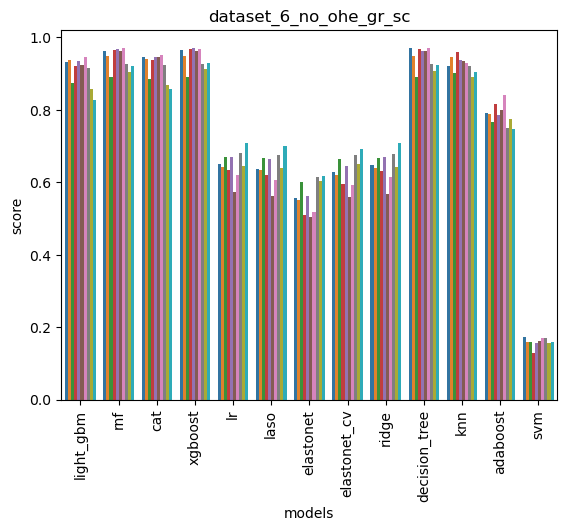

In [248]:
b = sns.barplot(x='models', y='value', hue = 'variable', data=cv_scores_df_with_sc_melt )
b.set_xticklabels(b.get_xticklabels(), rotation=90);
b.set_ylabel('score')
b.legend_.remove()
b.set_title('dataset_6_no_ohe_gr_sc')

# With OHE without scaling

In [100]:
cv_score_with_OHE_no_scalling = pd.read_csv("with OHE without scaling.csv")

In [101]:
cv_score_with_OHE_no_scalling

,0,1,2,3,4,5,6,7,8,9,models
0,0.919066,0.886177,0.913327,0.890234,0.889475,0.901032,0.904798,0.914289,0.905846,0.925708,light_gbm
1,0.957651,0.918816,0.946321,0.932773,0.923085,0.931990,0.911713,0.938737,0.966834,0.959163,rnf
2,0.912922,0.890487,0.917828,0.919113,0.926764,0.905286,0.925771,0.912353,0.933010,0.930742,cat
3,0.952070,0.921516,0.946382,0.932883,0.919478,0.930142,0.925580,0.948762,0.970866,0.955890,xgboost
4,0.664159,0.654358,0.658897,0.639010,0.666394,0.677728,0.699425,0.699520,0.610314,0.641405,lr
5,0.641511,0.635636,0.624111,0.607236,0.640670,0.662957,0.683425,0.685797,0.590699,0.624799,laso
6,0.641517,0.635136,0.624062,0.606932,0.640355,0.662738,0.683334,0.685411,0.590745,0.624627,elastonet
7,0.637052,0.633159,0.619754,0.603604,0.638622,0.663535,0.680702,0.683326,0.588795,0.619772,elastonet_cv
8,0.664253,0.654541,0.658716,0.638900,0.666370,0.677896,0.699621,0.699709,0.610523,0.641652,ridge
9,0.959082,0.919256,0.946789,0.934349,0.922111,0.928538,0.898382,0.946281,0.976222,0.956269,decision_tree


In [106]:
cv_score_with_OHE_no_scalling = cv_score_with_OHE_no_scalling.rename(columns={
    '0': 'CV_1',
    '1': 'CV_2',
    '2': 'CV_3',
    '3': 'CV_4',
    '4': 'CV_5',
    '5': 'CV_6',
    '6': 'CV_7',
    '7': 'CV_8',
    '8': 'CV_9',
    '9': 'CV_10',
})

In [108]:
cv_score_with_OHE_no_scalling.columns

Index(['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'CV_7', 'CV_8', 'CV_9',
       'CV_10', 'models'],
      dtype='object')

In [111]:
cv_score_with_OHE_no_scalling_melt = cv_score_with_OHE_no_scalling.melt(id_vars='models', 
                                                               value_vars= ['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'CV_7', 'CV_8', 'CV_9',
       'CV_10']   )

In [112]:
cv_score_with_OHE_no_scalling_melt

,models,variable,value
0,light_gbm,CV_1,0.919066
1,rnf,CV_1,0.957651
2,cat,CV_1,0.912922
3,xgboost,CV_1,0.952070
4,lr,CV_1,0.664159
...,...,...,...
125,ridge,CV_10,0.641652
126,decision_tree,CV_10,0.956269
127,knn,CV_10,0.923695
128,adaboost,CV_10,0.804375


Text(0.5, 1.0, 'Cross valiation score after one hot encoding without scaling')

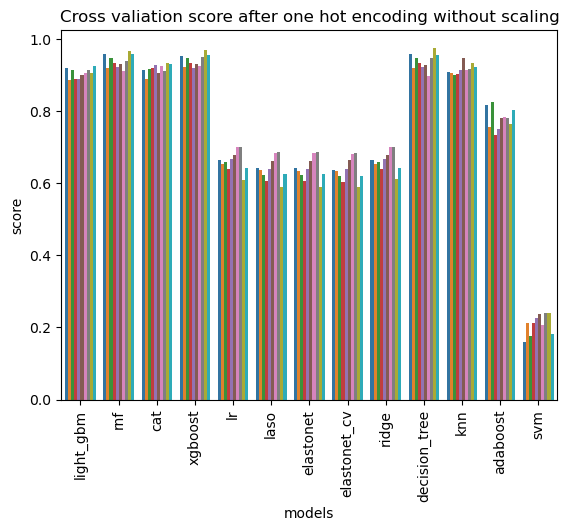

In [144]:
c = sns.barplot(x='models', y='value', hue = 'variable', data=cv_score_with_OHE_no_scalling_melt )
c.set_xticklabels(c.get_xticklabels(), rotation=90);
c.set_ylabel('score')
c.legend_.remove()
c.set_title('Cross valiation score after one hot encoding without scaling')

# CV score with only warp count OHE

In [119]:
cv_OHE_only_warp_cout= pd.read_csv('CV-score-with-OHE only one categorical colum-warp count.csv')

In [128]:
cv_OHE_only_warp_cout.drop('Mean', axis=1, inplace= True)

In [139]:
cv_OHE_only_warp_cout= cv_OHE_only_warp_cout.drop(13, axis=0)

In [140]:
cv_OHE_only_warp_cout_melt = cv_OHE_only_warp_cout.melt(id_vars='models', 
                                value_vars= ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']   )

In [149]:
cv_OHE_only_warp_cout_melt[['variable','value']] = cv_OHE_only_warp_cout_melt[['variable','value']].astype(float)

Text(0.5, 1.0, 'CV-score-with-OHE only one categorical colum')

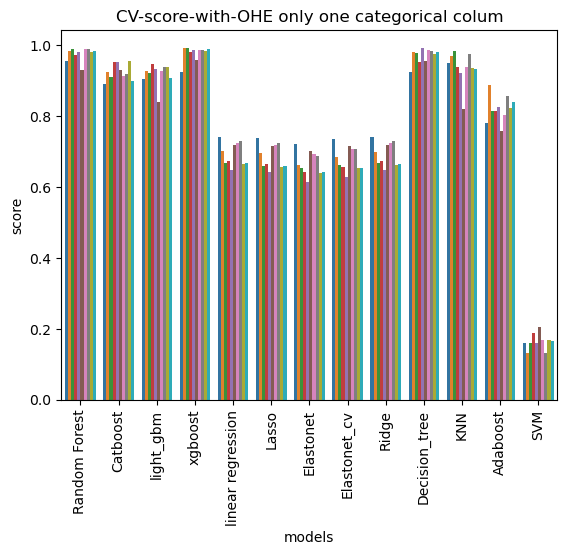

In [153]:
d = sns.barplot(x='models', y='value', hue = 'variable', data=cv_OHE_only_warp_cout_melt, errorbar=None )
d.set_xticklabels(d.get_xticklabels(), rotation=90);
d.set_ylabel('score')
d.legend_.remove()
d.set_title('CV-score-with-OHE only one categorical colum')

# visualization

In [1]:
import pandas as pd

In [77]:
d = pd.read_csv('CV-all-okay---.csv')

In [78]:
with_out_scaling = d.iloc[0:12, :]

In [79]:
with_scaling = d.iloc[14:, :]

In [80]:
d2 = pd.concat([with_scaling, with_out_scaling], keys=['scaled', 'with out scaled'])

In [81]:
d2.models

scaled           14        Random Forest
                 15             Catboost
                 16            light_gbm
                 17              xgboost
                 18    linear regression
                 19                Lasso
                 20            Elastonet
                 21         Elastonet_cv
                 22                Ridge
                 23        Decision_tree
                 24                  KNN
                 25             Adaboost
                 26                  SVM
with out scaled  0         Random Forest
                 1              Catboost
                 2             light_gbm
                 3               xgboost
                 4     linear regression
                 5                 Lasso
                 6             Elastonet
                 7          Elastonet_cv
                 8                 Ridge
                 9         Decision_tree
                 10                  KNN
                

In [82]:
d3 = d2.reset_index()

In [83]:
d3['level_1'] = d3.models

In [84]:
d4= d3.drop('models', axis=1)

In [85]:
d4['index'] = d3['level_0'] +'_'+ d3['level_1']
# d4

In [86]:
import seaborn as sns

In [88]:
d5= d4.melt(id_vars='index', value_vars=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], )

In [100]:
d4= d4.rename(columns={'level_0': 'Scaling', 'level_1': 'Algorithms'})

In [101]:
d4.head()

,Scaling,Algorithms,0,1,2,3,4,5,6,7,8,9,Mean,index
0,scaled,Random Forest,0.956097194,0.984867,0.989701,0.970520,0.979354,0.931479,0.989040,0.991334,0.983029,0.984728,0.976015,scaled_Random Forest
1,scaled,Catboost,0.892214094,0.924444,0.910316,0.951999,0.953047,0.930616,0.914382,0.919393,0.955160,0.898209,0.924978,scaled_Catboost
2,scaled,light_gbm,0.897425726,0.922892,0.919599,0.954547,0.939939,0.866795,0.926926,0.931476,0.945380,0.893284,0.919826,scaled_light_gbm
3,scaled,xgboost,0.924373225,0.993285,0.992800,0.981458,0.987239,0.958999,0.987755,0.986792,0.982967,0.989911,0.978558,scaled_xgboost
4,scaled,linear regression,0.742418546,0.700871,0.667498,0.673742,0.648562,0.719458,0.724211,0.731188,0.664248,0.666962,0.693916,scaled_linear regression


In [102]:
d6 = d4.melt(id_vars=['Scaling', 'Algorithms'], value_vars=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] )
d6['value']= d6['value'].astype(float)

In [90]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'score')

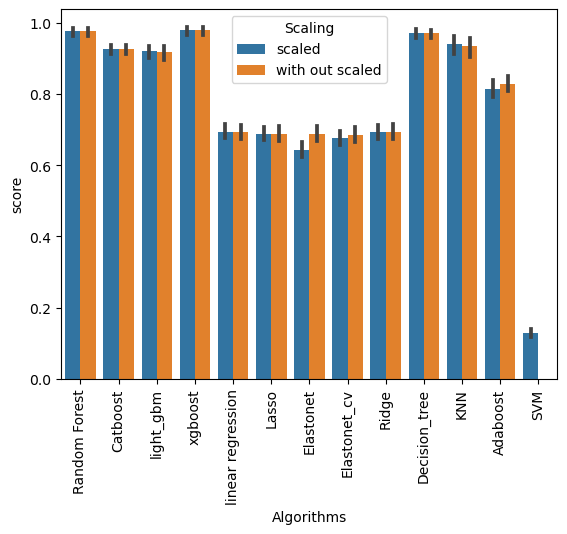

In [106]:
a = sns.barplot(x='Algorithms', y = 'value', data=d6, hue = 'Scaling' )
a.set_xticklabels(a.get_xticklabels(), rotation=90);
a.set_ylabel('score')